# Customer Attrition

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.


# Step 01) Importing Packages

In [1]:
# Import standard packages #

# Import third party packages #
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import roc_auc_score

%matplotlib inline
# Show all columns of dataframe
pd.options.display.max_columns = None
# ?
sns.set_palette('Set2')

# Step 02) Fetching Data

-  Importing data using pandas

In [2]:
dt = pd.read_csv('/home/arsal/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

-  Verifying Import

In [3]:
dt.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Step 03) Exploratory Data Analysis

## i. Basic Data Analysis

- On which columns our data consists of ?

In [4]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- What is the shape of dataset "dt" ?

In [5]:
dt.shape

(7043, 21)

Our data consists of 7043 rows and 21 columns

- what data-types of each feature and target variable are ?

In [6]:
dt.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Are all the features and target variable have same length of rows

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Yes they all are of same length: 7043

## Exploring Features: Univariate Analysis

#### Some Functions

In [8]:
# Creating functions of "Pie Chart" for the sake of reusability of this function

# Below function is for the features with only 2 levels
def pie_chart_two(l1, l2, s1, s2):
    labels = [l1,l2]
    sizes = [s1,s2]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

    
# Below function is for the features with only 3 levels
def pie_chart_three(l1, l2, l3, s1, s2, s3):
    labels = [l1,l2,l3]
    sizes = [s1,s2,s3]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

### __Catagorical Features__

### 1. CustomerID

* How many unique values this feature have ?

In [9]:
len(np.unique(dt.customerID))

7043

"In customerID column each record is unique"

* Basic summary of this feature

In [10]:
dt.customerID.describe()

count           7043
unique          7043
top       4854-CIDCF
freq               1
Name: customerID, dtype: object

As it seems to be a non-informative feature, we are going to drop this column.
* all values are unique
* and record is making no meaning out of it more than its a customer's unique number

Dropping a meaningless feature from a dataset is actually a good practise.

#### Dropping customerID

In [11]:
dt.drop('customerID', axis=1, inplace=True)

#### Verification

In [12]:
dt.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Churn

* How many unique values __Churn__ have ?

In [13]:
dt.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

There are total of __1869__ records where customer __churned__ out of __7043__ and total of __5174__ records where customer __not churned__ out of __7043__

Yes = Churned

No = Not Churned

* Lets visualize __churn__ 

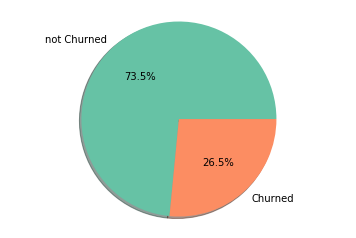

In [14]:
pie_chart_two('not Churned', 'Churned', dt['Churn'].value_counts()[0], dt['Churn'].value_counts()[1])

Our dataset consists __26.5%__ of the population who __churned__ and __73.5%__ of the population who are __loyal__

* Seperating __Churners__ and __non-churners__ data for the sake of __bivariate__ analysis

__Note:__ The code below is for reusability

In [15]:
churners = dt[dt['Churn'] =='Yes']
nonchurners = dt[dt['Churn'] =='No']

### 3. gender

* Unique values in gender and there counts

In [16]:
dt.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64


This feature is __categorical__ in nature and there is no order or prioritry between __male__ and __female__ so its a __nominal__ variable

* Visualizing __Gender__

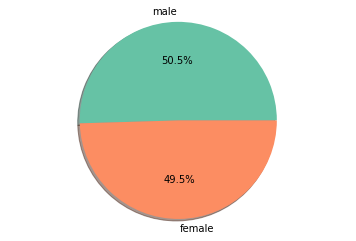

In [17]:
pie_chart_two('male', 'female', dt['gender'].value_counts()[0], dt['gender'].value_counts()[1])

The ratio of male and female in the whole data are approximately same, which means there is no such distinction between the gender using more telecom services

#### Bivariate analysis of gender with churn

* How many records we have where customer __churned__ and gender is __male__

In [18]:
male_churn_count = len(churners[churners['gender']=='Male'])
print('Frequency of Male Churners among Churners: ', male_churn_count)

Frequency of Male Churners among Churners:  930


What ratio they have in churners ?

In [19]:
frequency = male_churn_count/len(churners)*100
print("Ratio of Male churners amoung churners is: ", frequency)

Ratio of Male churners amoung churners is:  49.75922953451043


* How many records we have where customer __churned__ and gender is __female__

In [20]:
male_churn_count = len(churners[churners['gender']=='Female'])
print('Frequency of Female Churners among Churners: ', male_churn_count)

Frequency of Female Churners among Churners:  939


* What ratio they have in churners ?

In [21]:
frequency = male_churn_count/len(churners)*100
print("Ratio of Female churners amoung churners is: ", frequency)

Ratio of Female churners amoung churners is:  50.24077046548957


* How many records we have where customer __non churned__ and gender is __male__

In [22]:
male_churn_count = len(nonchurners[nonchurners['gender']=='Male'])
print('Frequency of Male nonChurners among nonChurners: ', male_churn_count)

Frequency of Male nonChurners among nonChurners:  2625


What ratio they have in nonchurners ?

In [23]:
frequency = male_churn_count/len(nonchurners)*100
print("Ratio of Male nonchurners amoung nonchurners is: ", frequency)

Ratio of Male nonchurners amoung nonchurners is:  50.73444143795902


* How many records we have where customer __non churned__ and gender is __female__

In [24]:
male_churn_count = len(nonchurners[nonchurners['gender']=='Female'])
print('Frequency of Female nonChurners among nonChurners: ', male_churn_count)

Frequency of Female nonChurners among nonChurners:  2549


* What ratio they have in nonchurners ?

In [25]:
frequency = male_churn_count/len(nonchurners)*100
print("Ratio of Female nonchurners amoung nonchurners is: ", frequency)

Ratio of Female nonchurners amoung nonchurners is:  49.26555856204097


* Lets visualize gender with churners and non-churners

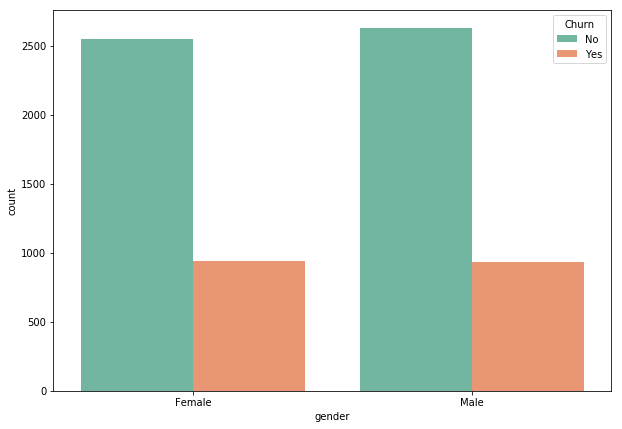

In [26]:
plt.figure(figsize=(10,7))
sns.countplot('gender', data=dt, hue='Churn')

__Its almosts a same trend of chuners in male and female, which might not impact on the output if gender is used for prediction__ 

* We are not sure weather to use this feature as a predictor, lets move forward for correlation between gender and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [27]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.gender , dt.Churn)

In [28]:
cont_table

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [29]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]
probability=0.950, critical=3.841, stat=0.484
Independent (fail to reject H0)
significance=0.050, p=0.487
Independent (fail to reject H0)


__Conclusion:__ We observed above on the graph that there is no such trend found in the churners data which forms distinction between churners and non-churners considering gender as a predictive feature, and even correlation is not showing any significant relation between the predictive feature and the target variable

### 4.  Tech Support

* Unique values in techsupport and there counts

In [30]:
dt.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable

* Visualizing __TechSupport__

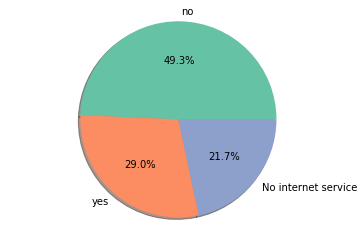

In [31]:
pie_chart_three('no', 'yes', 'No internet service', dt['TechSupport'].value_counts()[0], dt['TechSupport'].value_counts()[1], dt['TechSupport'].value_counts()[2])

The ratio of __No, Yes, No innternet Services__ in the whole data are different from one another, which means there might be some distinction between the levels where churn might be geater.

#### Bivariate analysis of TechSupport with churn

* How many records we have where customer __churned__ and TechSupport is __No__

In [32]:
churn_count = len(churners[churners['TechSupport']=='No'])
print('Frequency of Users where customer is not using TechSupport among Churners: ', churn_count)

Frequency of Users where customer is not using TechSupport among Churners:  1446


* What ratio they have in churners ?

In [33]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer is not using TechSupport among Churners is: ", frequency)

Ratio of Users where customer is not using TechSupport among Churners is:  77.36757624398074


* How many records we have where customer __churned__ and TechSupport is __Yes__

In [34]:
churn_count = len(churners[churners['TechSupport']=='Yes'])
print('Frequency of Users where customer is using TechSupport among Churners: ', churn_count)

Frequency of Users where customer is using TechSupport among Churners:  310


What ratio they have in churners ?

In [35]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer is using TechSupport among Churners is: ", frequency)

Ratio of Users where customer is using TechSupport among Churners is:  16.586409844836812


* How many records we have where customer __churned__ and TechSupport is __No internet services__

In [36]:
churn_count = len(churners[churners['TechSupport']=='No internet service'])
print('Frequency of Users where customer is using TechSupport among Churners: ', churn_count)

Frequency of Users where customer is using TechSupport among Churners:  113


What ratio they have in churners ?

In [37]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer is using TechSupport among Churners is: ", frequency)

Ratio of Users where customer is using TechSupport among Churners is:  6.046013911182451


* How many records we have where customer __nonchurners__ and TechSupport is __No__

In [38]:
churn_count = len(nonchurners[nonchurners['TechSupport']=='No'])
print('Frequency of Users where customer is not using TechSupport among nonchurners: ', churn_count)

Frequency of Users where customer is not using TechSupport among nonchurners:  2027


* What ratio they have in churners ?

In [39]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is not using TechSupport among nonchurners is: ", frequency)

Ratio of Users where customer is not using TechSupport among nonchurners is:  39.17665249323541


* How many records we have where customer __nonchurners__ and TechSupport is __Yes__

In [40]:
churn_count = len(nonchurners[nonchurners['TechSupport']=='Yes'])
print('Frequency of Users where customer is using TechSupport among nonchurners: ', churn_count)

Frequency of Users where customer is using TechSupport among nonchurners:  1734


What ratio they have in churners ?

In [41]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is using TechSupport among nonchurners is: ", frequency)

Ratio of Users where customer is using TechSupport among nonchurners is:  33.513722458446075


* How many records we have where customer __nonchurners__ and TechSupport is __No internet services__

In [42]:
churn_count = len(nonchurners[nonchurners['TechSupport']=='No internet service'])
print('Frequency of Users where customer is using TechSupport among nonchurners: ', churn_count)

Frequency of Users where customer is using TechSupport among nonchurners:  1413


What ratio they have in churners ?

In [43]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is using TechSupport among nonchurners is: ", frequency)

Ratio of Users where customer is using TechSupport among nonchurners is:  27.309625048318516


* Lets visualize TechSupport with churners and non-churners

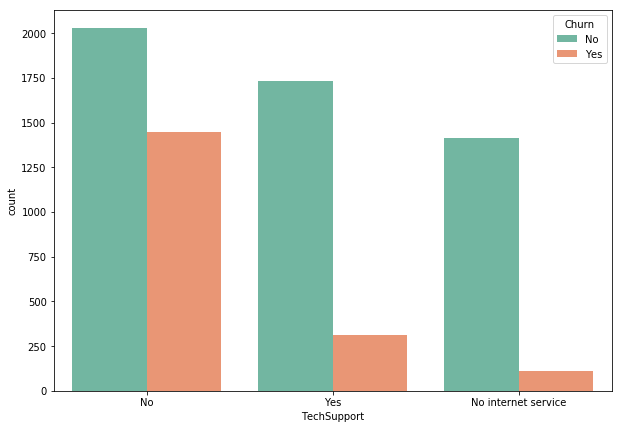

In [44]:
plt.figure(figsize=(10,7))
sns.countplot('TechSupport', data=dt, hue='Churn')

__Churning is high when TechSupport is 'No', which might impact on the output if TechSupport is used for prediction__ 

* Accoring to the above plot, TechSupport can be a good predictor. lets move forward for correlation between TechSupport and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [45]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.TechSupport , dt.Churn)

In [46]:
cont_table

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [47]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=2
[[2551.37043873  921.62956127]
 [1121.04557717  404.95442283]
 [1501.5839841   542.4160159 ]]
probability=0.950, critical=5.991, stat=828.197
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Conclusion:__ We observed above on the graph that there are some trends available in the data which forms distinction between churners and non-churners considering TechSupport as a predictive feature, and even correlation is showing significant relation between the predictive feature and the target variable

### 4.  Tech Support

* Unique values in techsupport and there counts

In [48]:
dt.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable

* Visualizing __TechSupport__

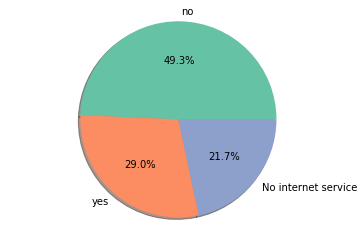

In [49]:
pie_chart_three('no', 'yes', 'No internet service', dt['TechSupport'].value_counts()[0], dt['TechSupport'].value_counts()[1], dt['TechSupport'].value_counts()[2])

The ratio of __No, Yes, No innternet Services__ in the whole data are different from one another, which means there might be some distinction between the levels where churn might be geater.

#### Bivariate analysis of TechSupport with churn

* How many records we have where customer __churned__ and TechSupport is __No__

In [50]:
churn_count = len(churners[churners['TechSupport']=='No'])
print('Frequency of Users where customer is not using TechSupport among Churners: ', churn_count)

Frequency of Users where customer is not using TechSupport among Churners:  1446


* What ratio they have in churners ?

In [51]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer is not using TechSupport among Churners is: ", frequency)

Ratio of Users where customer is not using TechSupport among Churners is:  77.36757624398074


* How many records we have where customer __churned__ and TechSupport is __Yes__

In [52]:
churn_count = len(churners[churners['TechSupport']=='Yes'])
print('Frequency of Users where customer is using TechSupport among Churners: ', churn_count)

Frequency of Users where customer is using TechSupport among Churners:  310


What ratio they have in churners ?

In [53]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer is using TechSupport among Churners is: ", frequency)

Ratio of Users where customer is using TechSupport among Churners is:  16.586409844836812


* How many records we have where customer __non churned__ and TechSupport is __No__

In [54]:
churn_count = len(nonchurners[nonchurners['TechSupport']=='No'])
print('Frequency of Users where customer is not using TechSupport among nonChurners: ', churn_count)

Frequency of Users where customer is not using TechSupport among nonChurners:  2027


* What ratio they have in nonchurners ?

In [55]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is not using TechSupport among nonChurners is: ", frequency)

Ratio of Users where customer is not using TechSupport among nonChurners is:  39.17665249323541


* How many records we have where customer __not churned__ and TechSupport is __Yes__

In [56]:
churn_count = len(nonchurners[nonchurners['TechSupport']=='Yes'])
print('Frequency of Users where customer is using TechSupport among nonChurners: ', churn_count)

Frequency of Users where customer is using TechSupport among nonChurners:  1734


What ratio they have in nonchurners ?

In [57]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is using TechSupport among nonChurners is: ", frequency)

Ratio of Users where customer is using TechSupport among nonChurners is:  33.513722458446075


* Lets visualize TechSupport with churners and non-churners

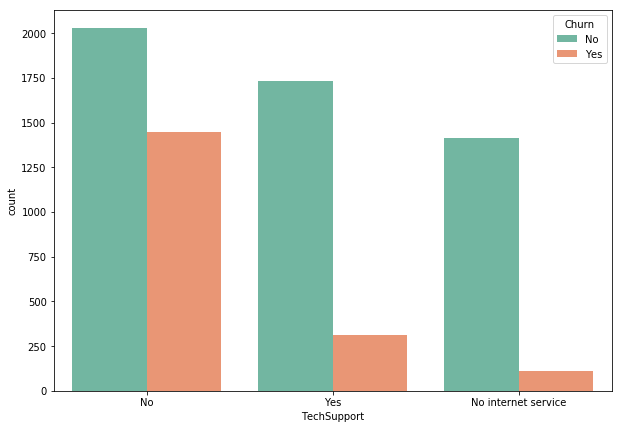

In [58]:
plt.figure(figsize=(10,7))
sns.countplot('TechSupport', data=dt, hue='Churn')

__Churning is high when TechSupport is 'No', which might impact on the output if TechSupport is used for prediction__ 

* Accoring to the above plot, TechSupport can be a good predictor. lets move forward for correlation between TechSupport and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [59]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.TechSupport , dt.Churn)

In [60]:
cont_table

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [61]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=2
[[2551.37043873  921.62956127]
 [1121.04557717  404.95442283]
 [1501.5839841   542.4160159 ]]
probability=0.950, critical=5.991, stat=828.197
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Conclusion:__ We observed above on the graph that there are some trends available in the data which forms distinction between churners and non-churners considering TechSupport as a predictive feature, and even correlation is showing significant relation between the predictive feature and the target variable

### 5.  Dependents

* Unique values in Dependents and there counts

In [62]:
dt.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64


This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable

* Visualizing __Dependents__

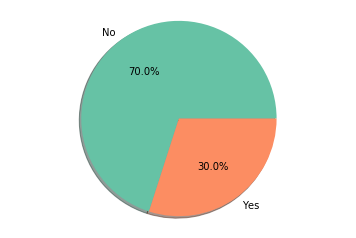

In [63]:
pie_chart_two('No', 'Yes', dt['Dependents'].value_counts()[0], dt['Dependents'].value_counts()[1])

The ratio of __No, Yes__ in the whole data are different from one another, which means there might be some distinction between the levels where churn might be geater.

#### Bivariate analysis of Dependents with churn

* How many records we have where customer __churned__ and Dependents is __No__

In [64]:
churn_count = len(churners[churners['Dependents']=='No'])
print('Frequency of Users where customer is not dependent among Churners: ', churn_count)

Frequency of Users where customer is not dependent among Churners:  1543


* What ratio they have in churners ?

In [65]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer is not dependent among Churners is: ", frequency)

Ratio of Users where customer is not dependent among Churners is:  82.55751738897807


* How many records we have where customer __churned__ and Dependent is __Yes__

In [66]:
churn_count = len(churners[churners['Dependents']=='Yes'])
print('Frequency of Users where customer is Dependent among Churners: ', churn_count)

Frequency of Users where customer is Dependent among Churners:  326


* What ratio they have in churners ?

In [67]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer is Dependent among Churners is: ", frequency)

Ratio of Users where customer is Dependent among Churners is:  17.442482611021937


* How many records we have where customer __nonchurned__ and Dependents is __No__

In [68]:
churn_count = len(nonchurners[nonchurners['Dependents']=='No'])
print('Frequency of Users where customer is not dependent among nonchurners: ', churn_count)

Frequency of Users where customer is not dependent among nonchurners:  3390


* What ratio they have in nonchurners ?

In [69]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is not dependent among nonchurners is: ", frequency)

Ratio of Users where customer is not dependent among nonchurners is:  65.51990722844995


* How many records we have where customer __nonchurners__ and Dependent is __Yes__

In [70]:
churn_count = len(nonchurners[nonchurners['Dependents']=='Yes'])
print('Frequency of Users where customer is Dependent among nonchurners: ', churn_count)

Frequency of Users where customer is Dependent among nonchurners:  1784


* What ratio they have in nonchurners ?

In [71]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is Dependent among nonchurners is: ", frequency)

Ratio of Users where customer is Dependent among nonchurners is:  34.480092771550055


In [72]:
dependent_churn = dt[dt['Dependents']=='No']
print('Where Dependents are No: ', len(dependent_churn))
print('churners where dependents are No: ', len(dependent_churn[dependent_churn['Churn']=='No']))
print('Ratio of churners where dependents are No: ', len(dependent_churn[dependent_churn['Churn']=='No'])/len(dt)*100)
print('churners where dependents are Yes: ', len(dependent_churn[dependent_churn['Churn']=='Yes']))
print('Ratio of churners where dependents are Yes: ', len(dependent_churn[dependent_churn['Churn']=='Yes'])/len(dt)*100)

Where Dependents are No:  4933
churners where dependents are No:  3390
Ratio of churners where dependents are No:  48.13289791282124
churners where dependents are Yes:  1543
Ratio of churners where dependents are Yes:  21.908277722561408


In [73]:
dependent_churn = dt[dt['Dependents']=='Yes']
print('Where Dependents are Yes: ', len(dependent_churn))
print('Dependents where Churn is No: ', len(dependent_churn[dependent_churn['Churn']=='No']))
print('Ratio of Dependents where churn are No: ', len(dependent_churn[dependent_churn['Churn']=='No'])/len(dt)*100)
print('Dependents where Churn is Yes: ', len(dependent_churn[dependent_churn['Churn']=='Yes']))
print('Ratio of Dependents where churn are Yes: ', len(dependent_churn[dependent_churn['Churn']=='Yes'])/len(dt)*100)

Where Dependents are Yes:  2110
Dependents where Churn is No:  1784
Ratio of Dependents where churn are No:  25.330115007809173
Dependents where Churn is Yes:  326
Ratio of Dependents where churn are Yes:  4.628709356808178


* Lets visualize TechSupport with churners and non-churners

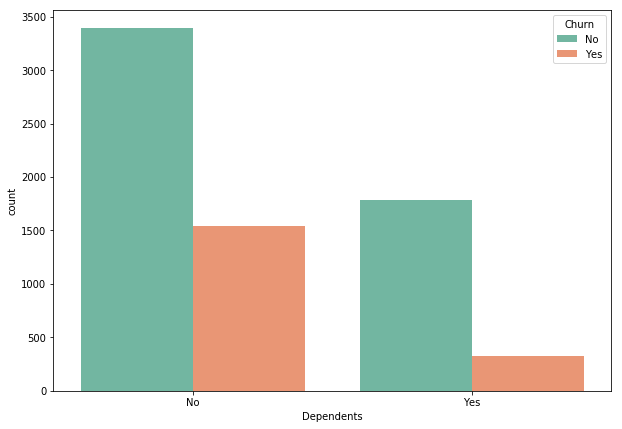

In [74]:
plt.figure(figsize=(10,7))
sns.countplot('Dependents', data=dt, hue='Churn')

__Churning is high when Dependent is 'No', which might impact on the output if thisfeature is used for prediction__ 

* Accoring to the above plot, churners and non-chuners both's frequency is high when dependent is no. So to conclude either this feature is a good predictor or not lets move forward for correlation between Dependents and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [75]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.Dependents , dt.Churn)

In [76]:
cont_table

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [77]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[3623.93042737 1309.06957263]
 [1550.06957263  559.93042737]]
probability=0.950, critical=3.841, stat=189.129
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Conclusion:__ We observed above on the graph that there are some trends available in the data which forms distinction between churners and non-churners considering Depedents as a predictive feature, and even correlation is showing significant relation between the predictive feature and the target variable.

### 6.  Contract

* Unique values in  Contract and there counts

In [78]:
dt.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable

* Visualizing __ Contract__

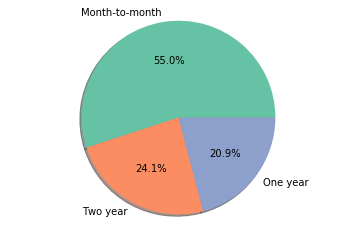

In [79]:
pie_chart_three('Month-to-month', 'Two year', 'One year', dt['Contract'].value_counts()[0], dt['Contract'].value_counts()[1], dt['Contract'].value_counts()[2])

The ratio of each level in the whole data are different from one another, Month to Month contract is used by more than 50% of the customer, which means there might be some distinction between the levels where churn might be geater.

#### Bivariate analysis of Contract with churn

* How many records we have where customer __churned__ and Contract is __MOnth to Month__

In [80]:
churn_count = churners[churners['Contract']=='Month-to-month']
print('Frequency of Users where customer is using Month to month contract among Churners: ', len(churn_count))

Frequency of Users where customer is using Month to month contract among Churners:  1655


* What ratio they have in churners ?

In [81]:
frequency = len(churn_count)/len(churners)*100
print("Ratio of Users where customer is using Month to month contract Churners is: ", frequency)

Ratio of Users where customer is using Month to month contract Churners is:  88.55002675227395


In [82]:
len(dt)

7043

In [83]:
dt_temp = dt[dt['Contract']=='Month-to-month']
dt_temp['Churn'].value_counts()/len(dt)*100

No     31.520659
Yes    23.498509
Name: Churn, dtype: float64

* How many records we have where customer __churned__ and Contract is __Two Year__

In [84]:
churn_count = churners[churners['Contract']=='Two year']
print('Frequency of Users where customer is using Two year contract among Churners: ', len(churn_count))

Frequency of Users where customer is using Two year contract among Churners:  48


* What ratio they have in churners ?

In [85]:
frequency = len(churn_count)/len(churners)*100
print("Ratio of Users where customer is using Two year contract among Churners is: ", frequency)

Ratio of Users where customer is using Two year contract among Churners is:  2.568218298555377


In [86]:
churn_count['Churn'].value_counts()[0]/len(dt)*100

0.6815277580576459

In [87]:
dt_temp = dt[dt['Contract']=='Two year']
dt_temp['Churn'].value_counts()/len(dt)*100

No     23.384921
Yes     0.681528
Name: Churn, dtype: float64

* How many records we have where customer __churned__ and Contract is __One Year__

In [332]:
churn_count = churners[churners['Contract']=='One year']
print('Frequency of Users where customer is using One year contract among Churners: ', len(churn_count))

Frequency of Users where customer is using One year contract among Churners:  166


In [89]:
frequency = len(churn_count)/len(churners)*100
print("Ratio of Users where customer is using Two year contract among Churners is: ", frequency)

Ratio of Users where customer is using Two year contract among Churners is:  8.881754949170679


In [90]:
churn_count['Churn'].value_counts()[0]/len(dt)*100

2.3569501632826917

In [91]:
dt_temp = dt[dt['Contract']=='One year']
dt_temp['Churn'].value_counts()/len(dt)*100

No     18.557433
Yes     2.356950
Name: Churn, dtype: float64

* How many records we have where customer __nonchurners__ and Contract is __MOnth to Month__

In [92]:
churn_count = len(nonchurners[nonchurners['Contract']=='Month-to-month'])
print('Frequency of Users where customer is using Month to month contract among nonchurners: ', churn_count)

Frequency of Users where customer is using Month to month contract among nonchurners:  2220


* What ratio they have in nonchurners ?

In [93]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is using Month to month contract nonchurners is: ", frequency)

Ratio of Users where customer is using Month to month contract nonchurners is:  42.906841901816776


* How many records we have where customer __nonchurners__ and Contract is __Two Year__

In [94]:
churn_count = len(nonchurners[nonchurners['Contract']=='Two year'])
print('Frequency of Users where customer is using Two year contract among nonchurners: ', churn_count)

Frequency of Users where customer is using Two year contract among nonchurners:  1647


* What ratio they have in nonchurners ?

In [95]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is using Two year contract among nonchurners is: ", frequency)

Ratio of Users where customer is using Two year contract among nonchurners is:  31.83223811364515


* How many records we have where customer __nonchurners__ and Contract is __One Year__

In [96]:
churn_count = len(nonchurners[nonchurners['Contract']=='One year'])
print('Frequency of Users where customer is using One year contract among nonchurners: ', churn_count)

Frequency of Users where customer is using One year contract among nonchurners:  1307


* What ratio they have in nonchurners ?

In [97]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer is using One year contract among nonchurners is: ", frequency)

Ratio of Users where customer is using One year contract among nonchurners is:  25.260919984538077


* Lets visualize TechSupport with churners and non-churners

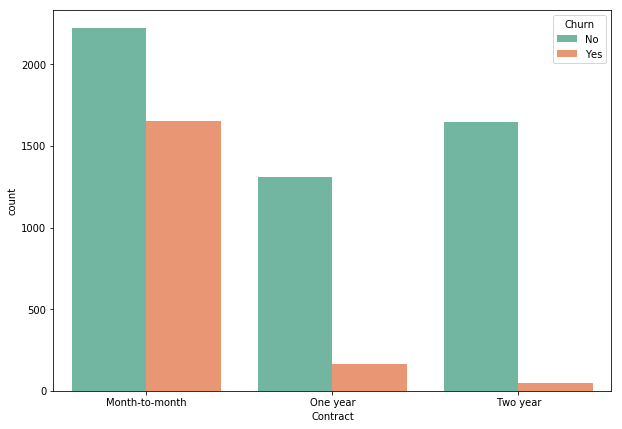

In [98]:
plt.figure(figsize=(10,7))
sns.countplot('Contract', data=dt, hue='Churn')

__Churning is high when Contract is 'Month to Month', which might impact on the output if thisfeature is used for prediction__ 

* Accoring to the above plot, churners are high when Contract is Monthly. So to conclude either this feature is a good predictor or not lets move forward for correlation between Contract and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [99]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.Contract , dt.Churn)

In [100]:
cont_table

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [101]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=2
[[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]
probability=0.950, critical=5.991, stat=1184.597
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Conclusion:__ We observed above on the graph that there are some trends available in the data which forms distinction between churners and non-churners considering Contract as a predictive feature, and even correlation is showing significant relation between the predictive feature and the target variable.

### 7.  Partner

* Unique values in Partner and there counts

In [102]:
dt.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64


This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable

* Visualizing __ Partner__

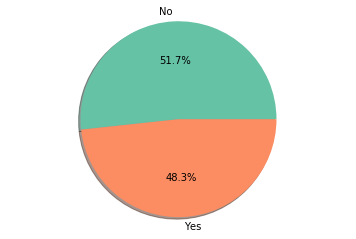

In [103]:
pie_chart_two('No', 'Yes', dt['Partner'].value_counts()[0], dt['Partner'].value_counts()[1])

The ratio of each level in the whole data are approximately same, more than 50% of total population are not partners, no such trend appeared to use this feature as a predictor.

#### Bivariate analysis of Partners with churn

* How many records we have where customer __churned__ and Partner is __No__

In [104]:
churn_count = len(churners[churners['Partner']=='No'])
print('Frequency of Users where there is no partner among Churners: ', churn_count)

Frequency of Users where there is no partner among Churners:  1200


* What ratio they have in churners ?

In [105]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where there is no partners among Churners is: ", frequency)

Ratio of Users where there is no partners among Churners is:  64.20545746388443


* How many records we have where customer __churned__ and and Partner is Yes

In [106]:
churn_count = len(churners[churners['Partner']=='Yes'])
print('Frequency of Users where customer have partners among Churners: ', churn_count)

Frequency of Users where customer have partners among Churners:  669


* What ratio they have in churners ?

In [107]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where customer have partners among Churners is: ", frequency)

Ratio of Users where customer have partners among Churners is:  35.79454253611557


In [108]:
partner_no = dt[dt['Partner']=='No']
partner_no['Churn'].value_counts()/len(dt)*100

No     34.658526
Yes    17.038194
Name: Churn, dtype: float64

In [109]:
partner_no = dt[dt['Partner']=='Yes']
partner_no['Churn'].value_counts()/len(dt)*100

No     38.804487
Yes     9.498793
Name: Churn, dtype: float64

* How many records we have where customer __nonchurners__ and Partner is __No__

In [110]:
churn_count = len(nonchurners[nonchurners['Partner']=='No'])
print('Frequency of Users where there is no partner among nonchurners: ', churn_count)

Frequency of Users where there is no partner among nonchurners:  2441


* What ratio they have in nonchurners ?

In [111]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where there is no partners among nonchurners is: ", frequency)

Ratio of Users where there is no partners among nonchurners is:  47.17819868573637


* How many records we have where customer __nonchurners__ and and Partner is Yes

In [112]:
churn_count = len(nonchurners[nonchurners['Partner']=='Yes'])
print('Frequency of Users where customer have partners among nonchurners: ', churn_count)

Frequency of Users where customer have partners among nonchurners:  2733


* What ratio they have in churners ?

In [113]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where customer have partners among nonchurners is: ", frequency)

Ratio of Users where customer have partners among nonchurners is:  52.82180131426363


* Lets visualize TechSupport with churners and non-churners

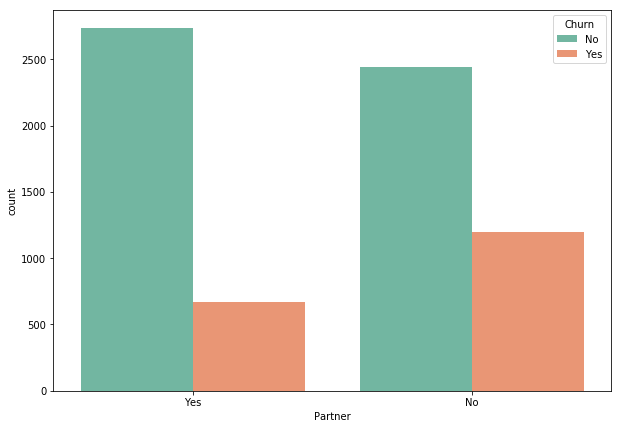

In [114]:
plt.figure(figsize=(10,7))
sns.countplot('Partner', data=dt, hue='Churn')

__Churning is high when user dosen't have a PARTNER and user churn less when they are partners, which might impact on the output if thisfeature is used for prediction__ 

* Accoring to the above plot, churners are high when Contract is Monthly. So to conclude either this feature is a good predictor or not lets move forward for correlation between Contract and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [115]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.Partner , dt.Churn)

In [116]:
cont_table

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [117]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[2674.78830044  966.21169956]
 [2499.21169956  902.78830044]]
probability=0.950, critical=3.841, stat=158.733
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Conclusion:__ We observed above on the graph that there are some trends available in the data which forms distinction between churners and non-churners considering Partners as a predictive feature, and even correlation is showing significant relation between the predictive feature and the target variable.

### 8.  Tenure

* Datatype of tenure ?

In [118]:
dt.tenure.dtype

dtype('int64')

* Basic Summary of tenure

In [119]:
dt.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Frequency of records lying under 25% of tenue data

In [120]:
len(dt[dt.tenure < 9])

1735

Frequency of records lying under 50% of tenue data

In [121]:
len(dt[dt.tenure < 29])

3497

Frequency of records lying under 75% of tenue data

In [122]:
len(dt[dt.tenure < 55])

5224

* Visualizing tenure

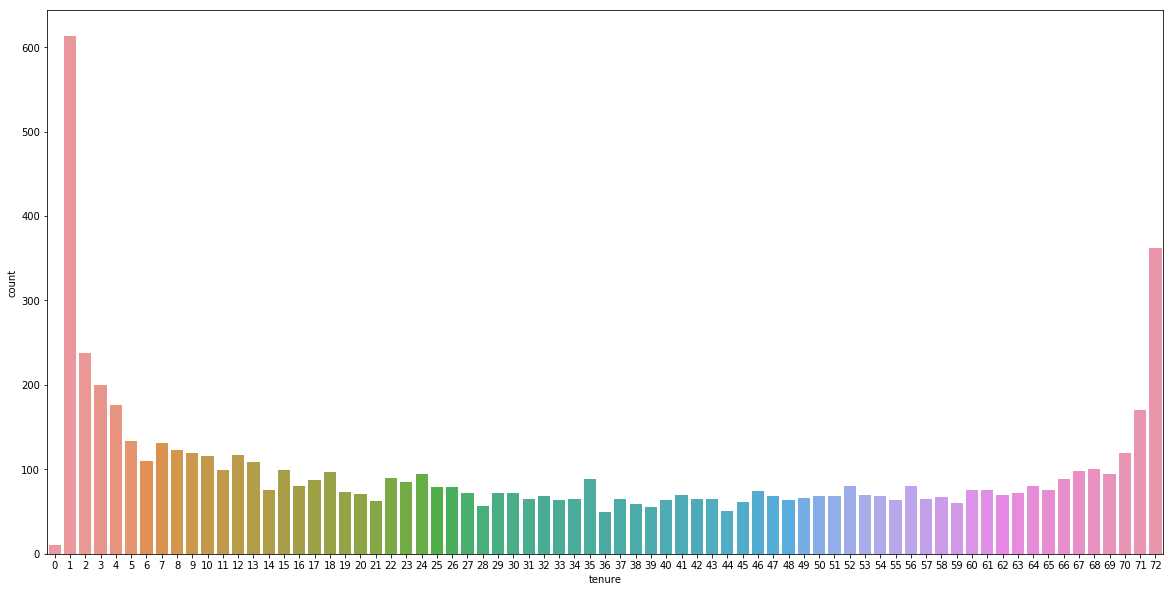

In [123]:
plt.figure(figsize=(20,10))
sns.countplot(x=dt.tenure)

In [124]:
len(dt[dt['tenure']==1])/len(dt)*100

8.70367741019452

In [125]:
len(dt[dt['tenure']==72])/len(dt)*100

5.139855175351412

In [126]:
frequency = pd.crosstab(dt.tenure,'frequency')
frequency
limit = len(frequency['frequency']>100)
print("tenure's count where frequency is above 100: ", limit)
print('Ratio of tenure where frequecy is above 100 "all frequency": ', limit/len(frequency)*100)
print('Ratio of tenure where frequecy is above 100 "Whole Data": ', limit/len(dt)*100)

tenure's count where frequency is above 100:  73
Ratio of tenure where frequecy is above 100 "all frequency":  100.0
Ratio of tenure where frequecy is above 100 "Whole Data":  1.0364901320460032


This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable. 50% of the population lies under 29 months of tenure and 75% of the population lies under 55 months of tenure.

#### Bivariate analysis of Tenure with churn

* Basic summary of nonchurners data with tenure

In [127]:
nonchurners.tenure.describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

* Basic summary of churners data with tenure

In [128]:
churners.tenure.describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

Frequency of records lying under 25% of tenue data

In [129]:
len(churners[churners.tenure < 2])

380

Frequency of records lying under 50% of tenue data

In [130]:
len(churners[churners.tenure < 10])

923

Frequency of records lying under 75% of tenue data

In [131]:
len(dt[dt.tenure == 29])/len(dt)*100

1.0222916370864688

In [132]:
sample_dt = dt[dt['tenure']==61]
sample_dt['Churn'].value_counts()/len(sample_dt)*100

No     89.473684
Yes    10.526316
Name: Churn, dtype: float64

In [133]:
sample_dt = dt[dt['tenure']==38]
sample_dt['Churn'].value_counts()/len(sample_dt)*100

No     77.966102
Yes    22.033898
Name: Churn, dtype: float64

In [134]:
sample_dt = dt[dt['tenure']==15]
sample_dt['Churn'].value_counts()/len(sample_dt)*100

No     62.626263
Yes    37.373737
Name: Churn, dtype: float64

In [135]:
sample_dt = dt[dt['tenure']==29]
sample_dt['Churn'].value_counts()/len(dt)

No     0.008093
Yes    0.002130
Name: Churn, dtype: float64

In [136]:
sample_dt = dt[dt['tenure']==10]
sample_dt['Churn'].value_counts()/len(sample_dt)*100

No     61.206897
Yes    38.793103
Name: Churn, dtype: float64

In [137]:
sample_dt = dt[dt['tenure']==2]
sample_dt['Churn'].value_counts()/len(sample_dt)*100

Yes    51.680672
No     48.319328
Name: Churn, dtype: float64

* Plotting countplot

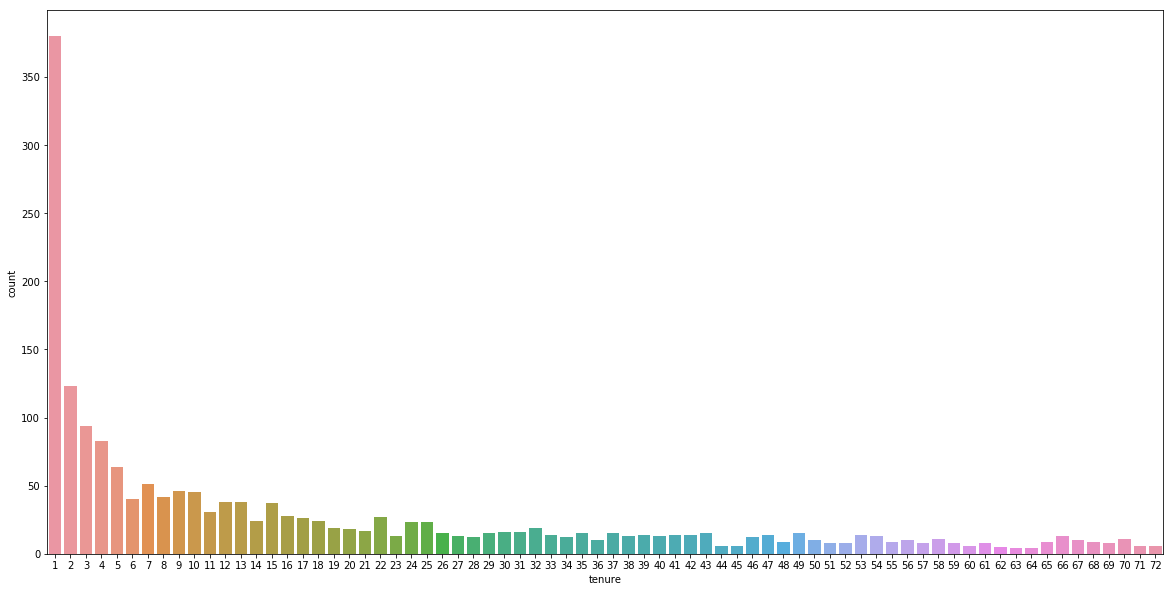

In [138]:
plt.figure(figsize=(20,10))
sns.countplot(x=churners.tenure)

Thing to notice in this plot is that in churners data initial tenure's frequency is high and as tenure is getting high churners frequency is getting so low

* Plotting Boxplot

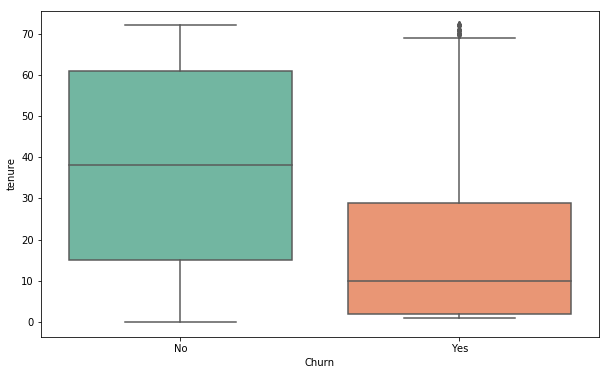

In [139]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=dt["Churn"], y=dt['tenure'])

* How many __outliers__ are in __churners__ boxplot?

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'tenure')]

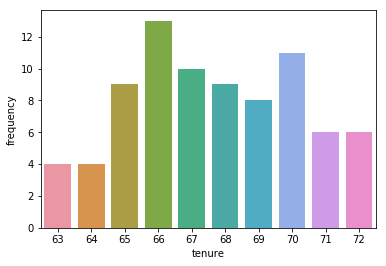

In [140]:
sorted_churner_dt = churners.tenure.value_counts().reset_index().sort_values(by=['index'], ascending=False).head(10)
ax = sns.barplot(x='index', y='tenure', data=sorted_churner_dt)
ax.set(xlabel='tenure', ylabel='frequency')

#### We have seen above in tenure after plotting 'boxplot' that there is some noisy data existed in churners where tenure was high which might impact on the model's accuracy

* lets have a look of how much data is  noisy in churners

In [141]:
q1, q3= np.percentile(churners.tenure,[25,75])
print("q1 is: " + str(q1) + "," + "q3 is: " + str(q3) )

q1 is: 2.0,q3 is: 29.0


In [142]:
iqr = q3 - q1
print("iqr: ", iqr)

iqr:  27.0


In [143]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [144]:
temp = (dt['Churn']=='Yes')&(dt['tenure']>upper_bound)

In [145]:
temp.value_counts()

False    7020
True       23
dtype: int64

In [146]:
print("count of noisy data in churners: ", temp.value_counts()[1])

count of noisy data in churners:  23


In [147]:
print("And its ratio in churner's data is: " + str(temp.value_counts()[1]/len(churners)*100) + '% out of 1869 records(churners)')

And its ratio in churner's data is: 1.2306046013911183% out of 1869 records(churners)


* Removing noisy data and saving it another variable for testing purpose that either this removal of rows do our model improving

In [148]:
test_dt = dt[~temp]

* Accoring to the above plot, churners are high when tenure is low. So to conclude either this feature is a good predictor or not lets move forward for correlation between tenure and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [149]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.Churn , dt.tenure)

In [150]:
cont_table

tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Yes,0,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6


In [151]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=72
[[  8.08093142 450.3282692  174.84197075 146.92602584 129.29490274
   97.70580718  80.80931421  96.23654693  90.35950589  87.42098538
   85.21709499  72.72838279  85.95172512  80.07468408  55.83188982
   72.72838279  58.77041034  63.91282124  71.25912253  53.62799943
   52.15873917  46.28169814  66.11671163  62.44356098  69.05523215
   58.03578021  58.03578021  52.8933693   41.87391736  52.8933693
   52.8933693   47.7509584   50.68947892  47.01632827  47.7509584
   64.64745137  36.73150646  47.7509584   43.34317762  41.13928724
   47.01632827  51.42410904  47.7509584   47.7509584   37.46613659
   44.81243788  54.36262956  49.95484879  47.01632827  48.48558853
   49.95484879  49.95484879  58.77041034  51.42410904  49.95484879
   47.01632827  58.77041034  47.7509584   49.22021866  44.07780775
   55.83188982  55.83188982  51.42410904  52.8933693   58.77041034
   55.83188982  65.3820815   71.99375266  73.46301292  69.78986227
   87.42098538 124.88712197 265.93610677]
 [  2.91906858 

__Conclusion:__ We observed above on the graph that tenure is playing a vital role as feature in the data which forms distinction between churners and non-churners, and even correlation is showing significant relation between the predictive feature and the target variable.

### 9.  SeniorCitizen

* Unique values in SeniorCitizen and there counts

In [152]:
dt.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable

* Visualizing __ SeniorCitizen__

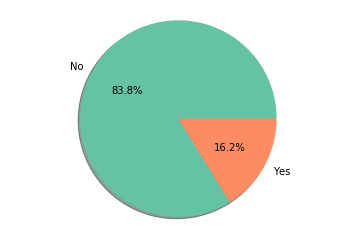

In [153]:
pie_chart_two('No', 'Yes', dt['SeniorCitizen'].value_counts()[0], dt['SeniorCitizen'].value_counts()[1])

The ratio of each level in the whole data contains a quite large difference, 50% of total population are not SeniorCitizens, this trend appeared might get usefull as a predictor.

#### Bivariate analysis of SeniorCitizen with churn

* How many records we have where customer __churned__ and SeniorCitizen is __No__

In [154]:
churn_count = len(churners[churners['SeniorCitizen']==0])
print('Frequency of Users where SeniorCitizen is No among Churners: ', churn_count)

Frequency of Users where SeniorCitizen is No among Churners:  1393


* What ratio they have in churners ?

In [155]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where SeniorCitizen is No Churners is: ", frequency)

Ratio of Users where SeniorCitizen is No Churners is:  74.53183520599251


* How many records we have where customer __churned__ and and SeniorCitizen is __Yes__

In [156]:
churn_count = len(churners[churners['SeniorCitizen']==1])
print('Frequency of Users where SeniorCitizen is Yes among Churners: ', churn_count)

Frequency of Users where SeniorCitizen is Yes among Churners:  476


* What ratio they have in churners ?

In [157]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where SeniorCitizen is Yes among Churners is: ", frequency)

Ratio of Users where SeniorCitizen is Yes among Churners is:  25.468164794007492


* How many records we have where customer __nonchurners__ and SeniorCitizen is __No__

In [158]:
churn_count = len(nonchurners[nonchurners['SeniorCitizen']==0])
print('Frequency of Users where SeniorCitizen is No among nonchurners: ', churn_count)

Frequency of Users where SeniorCitizen is No among nonchurners:  4508


* What ratio they have in nonchurners ?

In [159]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where SeniorCitizen is No nonchurners is: ", frequency)

Ratio of Users where SeniorCitizen is No nonchurners is:  87.12794742945496


* How many records we have where customer __nonchurners__ and and SeniorCitizen is __Yes__

In [160]:
churn_count = len(nonchurners[nonchurners['SeniorCitizen']==1])
print('Frequency of Users where SeniorCitizen is Yes among nonchurners: ', churn_count)

Frequency of Users where SeniorCitizen is Yes among nonchurners:  666


* What ratio they have in nonchurners ?

In [161]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where SeniorCitizen is Yes among nonchurners is: ", frequency)

Ratio of Users where SeniorCitizen is Yes among nonchurners is:  12.872052570545033


In [162]:
seniorcitizen = dt[dt['SeniorCitizen']==0]
seniorcitizen.Churn.value_counts()/len(dt)*100

No     64.006815
Yes    19.778503
Name: Churn, dtype: float64

In [163]:
seniorcitizen = dt[dt['SeniorCitizen']==1]
seniorcitizen.Churn.value_counts()/len(dt)*100

No     9.456198
Yes    6.758484
Name: Churn, dtype: float64

* Lets visualize SeniorCitizen with churners and non-churners

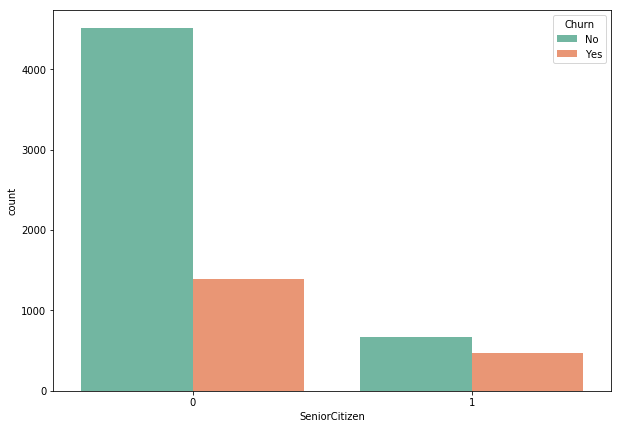

In [164]:
plt.figure(figsize=(10,7))
sns.countplot('SeniorCitizen', data=dt, hue='Churn')

__Churning is high when user is not seniors, which might impact on the output if this feature is used for prediction__ 

* Accoring to the above plot, churners are high where population is not senior. So to conclude either this feature is a good predictor or not lets move forward for correlation between Contract and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [165]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.SeniorCitizen , dt.Churn)

In [166]:
cont_table

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [167]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[4335.05239245 1565.94760755]
 [ 838.94760755  303.05239245]]
probability=0.950, critical=3.841, stat=159.426
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Conclusion:__ We observed above on the graph that there are some trends available in the data which forms distinction between churners and non-churners considering SeniorCitizens as a predictive feature, and even correlation is showing significant relation between the predictive feature and the target variable.

### 10.  InternetServices

* Unique values in  InternetServices and there counts

In [168]:
dt.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

This feature is __categorical__ in nature and there is no order or prioritry between the levels, so its a __nominal__ variable

* Visualizing __ InternetService__

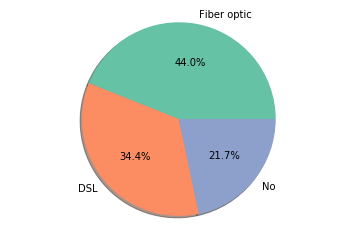

In [169]:
pie_chart_three('Fiber optic', 'DSL','No', dt['InternetService'].value_counts()[0], dt['InternetService'].value_counts()[1], dt['InternetService'].value_counts()[2])

The ratio of each level in the whole data is different from one another, this feature might be usefull as a predictor because there might be some trend of churners using any of the above options in InternetServices

#### Bivariate analysis of InternetService with churn

* How many records we have where customer __churned__ and InternetService is __No__

In [170]:
churn_count = len(churners[churners['InternetService']=='No'])
print('Frequency of Users where InternetService is No among Churners: ', churn_count)

Frequency of Users where InternetService is No among Churners:  113


* What ratio they have in churners ?

In [171]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where InternetService is No Churners is: ", frequency)

Ratio of Users where InternetService is No Churners is:  6.046013911182451


* How many records we have where customer __churned__  and InternetService is __DSL__

In [172]:
churn_count = len(churners[churners['InternetService']=='DSL'])
print('Frequency of Users where InternetService is DSL among Churners: ', churn_count)

Frequency of Users where InternetService is DSL among Churners:  459


* What ratio they have in churners ?

In [173]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where InternetService is DSL among Churners is: ", frequency)

Ratio of Users where InternetService is DSL among Churners is:  24.558587479935795


* How many records we have where customer __churned__  and InternetService is __Fiber optic__

In [174]:
churn_count = len(churners[churners['InternetService']=='Fiber optic'])
print('Frequency of Users where InternetService is Fiber optic among Churners: ', churn_count)

Frequency of Users where InternetService is Fiber optic among Churners:  1297


* What ratio they have in churners ?

In [175]:
frequency = churn_count/len(churners)*100
print("Ratio of Users where InternetService is Fiber optic among Churners is: ", frequency)

Ratio of Users where InternetService is Fiber optic among Churners is:  69.39539860888175


* How many records we have where customer __nonchurners__ and InternetService is __No__

In [176]:
churn_count = len(nonchurners[nonchurners['InternetService']=='No'])
print('Frequency of Users where InternetService is No among nonchurners: ', churn_count)

Frequency of Users where InternetService is No among nonchurners:  1413


* What ratio they have in nonchurners ?

In [177]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where InternetService is No nonchurners is: ", frequency)

Ratio of Users where InternetService is No nonchurners is:  27.309625048318516


* How many records we have where customer __nonchurners__  and InternetService is __DSL__

In [178]:
churn_count = len(nonchurners[nonchurners['InternetService']=='DSL'])
print('Frequency of Users where InternetService is DSL among nonchurners: ', churn_count)

Frequency of Users where InternetService is DSL among nonchurners:  1962


* What ratio they have in nonchurners ?

In [179]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where InternetService is DSL among nonchurners is: ", frequency)

Ratio of Users where InternetService is DSL among nonchurners is:  37.920371086200234


* How many records we have where customer __nonchurners__  and InternetService is __Fiber optic__

In [180]:
churn_count = len(nonchurners[nonchurners['InternetService']=='Fiber optic'])
print('Frequency of Users where InternetService is Fiber optic among nonchurners: ', churn_count)

Frequency of Users where InternetService is Fiber optic among nonchurners:  1799


* What ratio they have in nonchurners ?

In [181]:
frequency = churn_count/len(nonchurners)*100
print("Ratio of Users where InternetService is Fiber optic among nonchurners is: ", frequency)

Ratio of Users where InternetService is Fiber optic among nonchurners is:  34.77000386548125


In [182]:
fiberoptic = dt[dt['InternetService']=='Fiber optic']
fiberoptic.Churn.value_counts()/len(dt)*100

No     25.543092
Yes    18.415448
Name: Churn, dtype: float64

In [183]:
fiberoptic = dt[dt['InternetService']=='DSL']
fiberoptic.Churn.value_counts()/len(dt)*100

No     27.857447
Yes     6.517109
Name: Churn, dtype: float64

In [184]:
fiberoptic = dt[dt['InternetService']=='No']
fiberoptic.Churn.value_counts()/len(dt)*100

No     20.062473
Yes     1.604430
Name: Churn, dtype: float64

* Lets visualize SeniorCitizen with churners and non-churners

__Using Countplot__

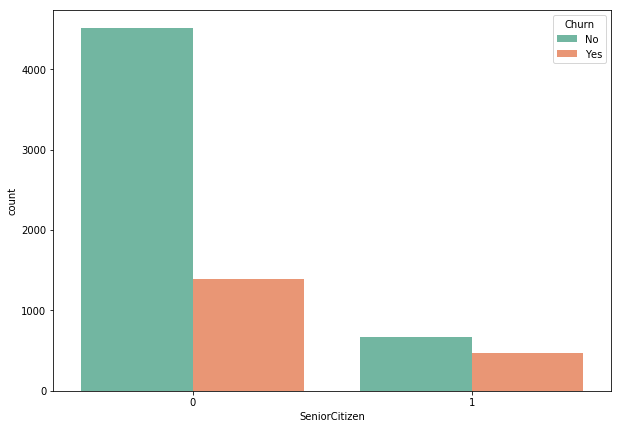

In [185]:
plt.figure(figsize=(10,7))
sns.countplot('SeniorCitizen', data=dt, hue='Churn')

__Using Pie Chart__

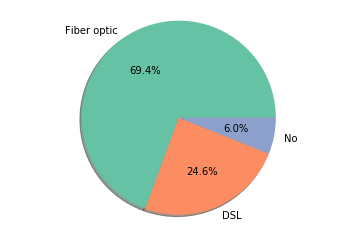

In [186]:
pie_chart_three('Fiber optic', 'DSL','No', churners['InternetService'].value_counts()[0], churners['InternetService'].value_counts()[1], churners['InternetService'].value_counts()[2])

Around 70% of the churners are using Fiber Optic.

(Multivariavte part: We will see while using fiber optic and at which point customers churn most)

__Churning is high when Fiber optic is used, which might impact on the output if this feature is used for prediction__ 

* Accoring to the above plot, churners are high where population is not senior. So to conclude either this feature is a good predictor or not lets move forward for correlation between Contract and churn, we might find this feature as a good predictor

      __Chi-Square Correlation:__  A technique to find correlation between two categorical variables

In [187]:
# First creating a __contengency__ table of __gender__ and __churn__,  __contengency__ table is use an input of chi-square
cont_table = pd.crosstab(dt.InternetService , dt.Churn)

In [188]:
cont_table

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [189]:
stat, p, dof, expected = chi2_contingency(cont_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=2
[[1778.53954281  642.46045719]
 [2274.41488002  821.58511998]
 [1121.04557717  404.95442283]]
probability=0.950, critical=5.991, stat=732.310
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


__Conclusion:__ We observed above on the graph that there are some trends available in the data which forms distinction between churners and non-churners considering InternetService as a predictive feature, and even correlation is showing significant relation between the predictive feature and the target variable.

## Exploring Features: Univariate Analysis

### Numerical Features

### 11.  MonthlyCharges

* Datatype of MonthlyCharges

In [190]:
dt.MonthlyCharges.dtypes

dtype('float64')

* Basic Summary of Montlhy Charges

In [191]:
dt.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

* Visualizing MonthlyCharges

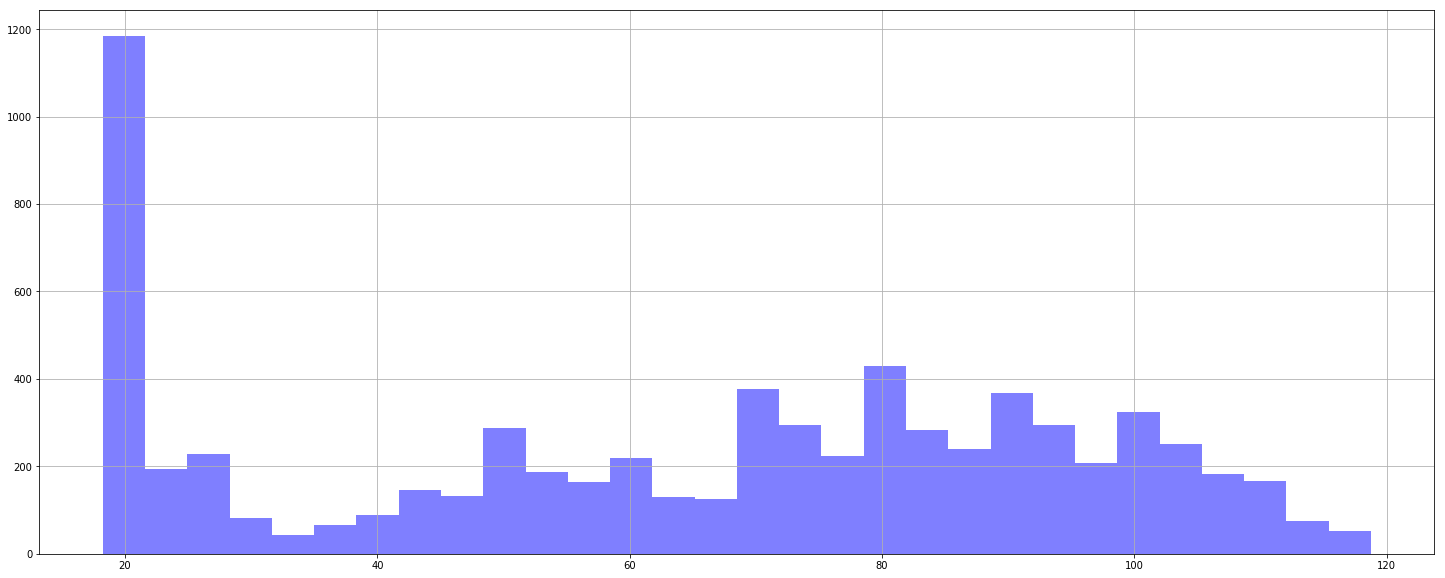

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
dt['MonthlyCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)

* What is ratio of dense area where monthly charges are:

a. Below 23

b. Above 60

In [193]:
# a. Randomly selecting value for monthly charges as a condition to check frequency of most occurred MonthlyCharges  
len_low = len(dt[dt['MonthlyCharges']<23])
print('Frequencey of customers where monthly charges are below 23: ', len_low)
print('Ratio of customers where monthly charges are below 23: ', len_low/len(dt)*100)

Frequencey of customers where monthly charges are below 23:  1185
Ratio of customers where monthly charges are below 23:  16.825216527048134


In [194]:
# b. Randomly selecting value for monthly charges as a condition to check frequency of most occurred MonthlyCharges  
MCharges = dt[(dt['MonthlyCharges'] > 60)&(dt['MonthlyCharges'] < 120)]
print('Frequencey of customers where monthly charges are above 60: ',len(MCharges))
print('Ratio of customers where monthly charges are above 60: ',len(MCharges)/len(dt)*100)

Frequencey of customers where monthly charges are above 60:  4125
Ratio of customers where monthly charges are above 60:  58.56879170807895


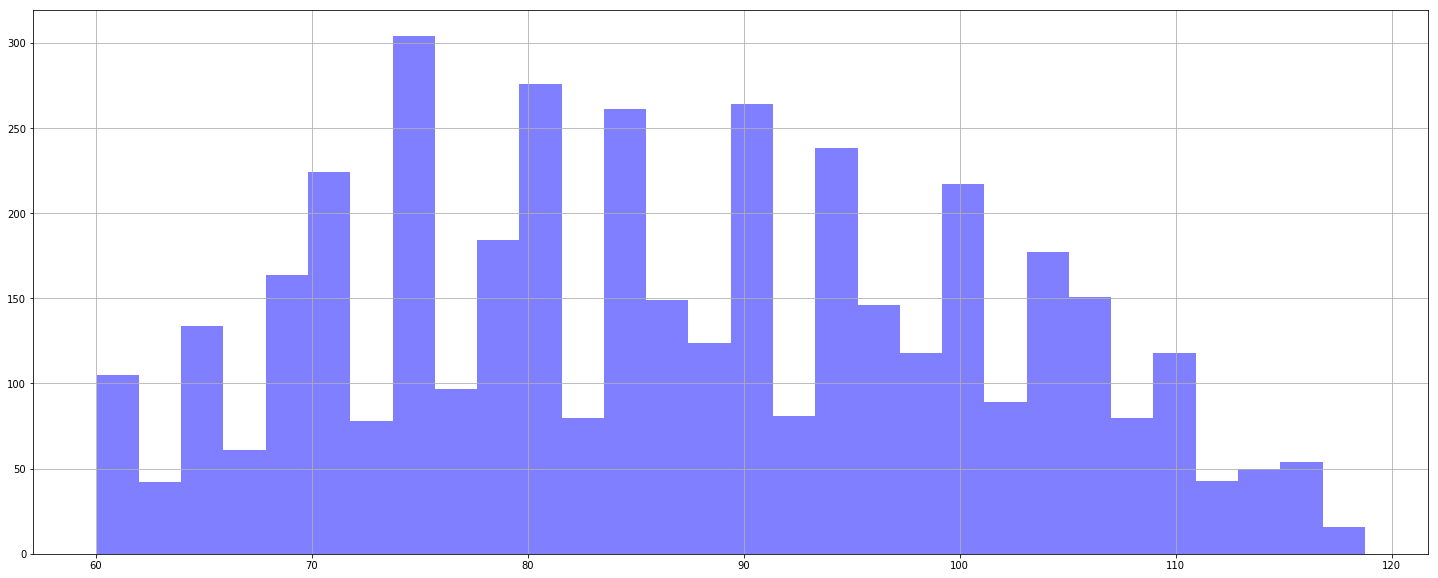

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
MCharges['MonthlyCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)

In [196]:
MCharges.Churn.value_counts()

No     2746
Yes    1379
Name: Churn, dtype: int64

__I noticed two trends in monthly charges. First, highest frequency of monthly charges is 1185 when monthlycharges are low.
Second, Most customer's monthlyCharges are above 60__

#### Bivariate analysis of MonthlyCharges with churn

* Basic summary of MonthlyCharges among churners

In [197]:
churners.MonthlyCharges.describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

* Basic summary of MonthlyCharges among non-churners

In [198]:
nonchurners.MonthlyCharges.describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

* Plotting Monthly Charges with churn

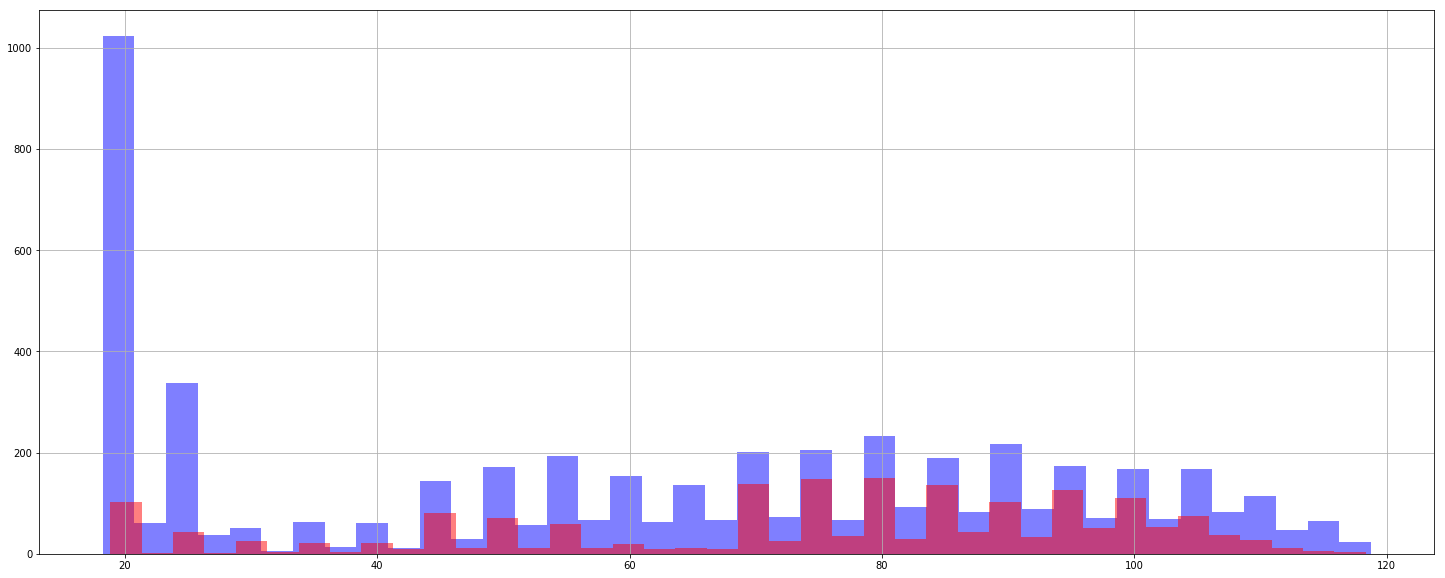

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
dt[dt.Churn == "No"]['MonthlyCharges'].hist(bins=40, color="blue", alpha=0.5, ax=ax)
dt[dt.Churn == "Yes"]['MonthlyCharges'].hist(bins=40, color="red", alpha=0.5, ax=ax)

* What is the ratio of dense area where monthly charges amoung churners:

In [200]:
# b. Randomly selecting value for monthly charges as a condition to check frequency of most occurred MonthlyCharges  
MCharges = churners[(churners['MonthlyCharges'] > 65)&(churners['MonthlyCharges'] < 110)]
print('Frequencey of customers where monthly charges are above 60: ',len(MCharges))
print('Ratio of customers where monthly charges are above 60: ',len(MCharges)/len(churners)*100)

Frequencey of customers where monthly charges are above 60:  1324
Ratio of customers where monthly charges are above 60:  70.84002140181916


* Plotting Churners data along with MonthlyCharges where MonthlyCharges are between 65 and 110

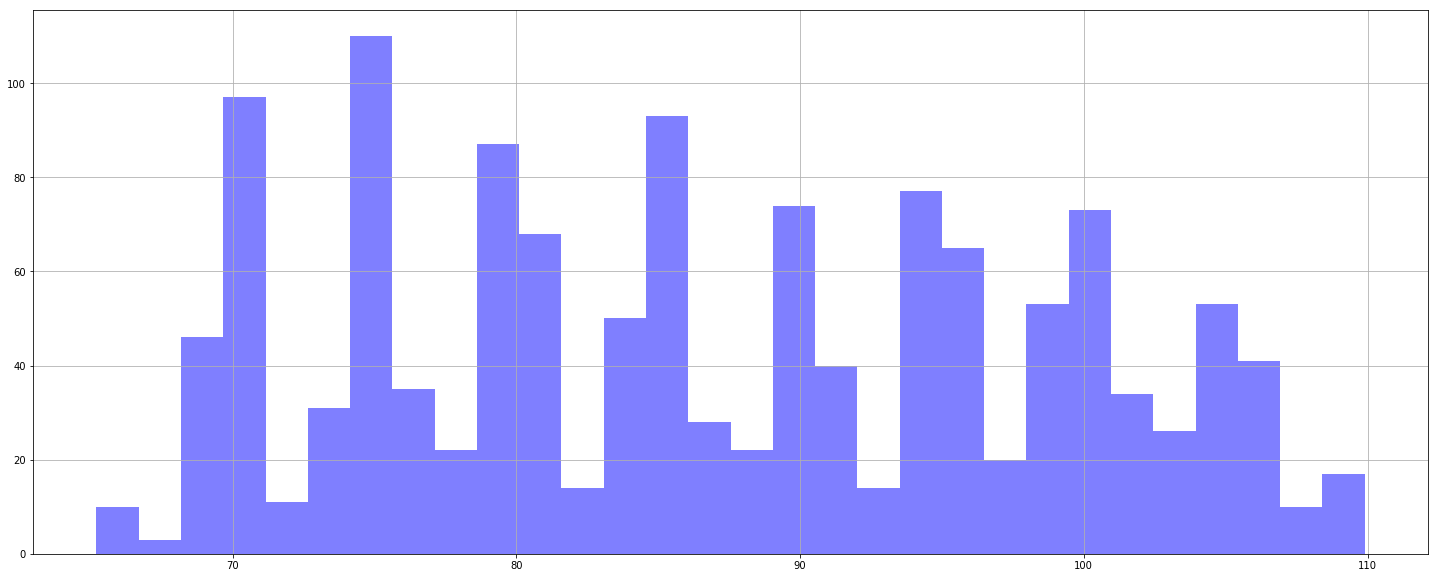

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
MCharges['MonthlyCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)

* What is a coorealtion between MonthlyCharges and Churn

In [202]:
# Preparing X for splitting
X = dt['MonthlyCharges']
# Encoding Churn into binary class for putting it as an input of a model
dt['churn_encoded'] = dt['Churn'].replace(['Yes','No'],[1,0])
# Preparing Y for splitting 
Y = dt.churn_encoded
# Spliting X and Y for training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X,Y)
train_X = train_X.values.reshape(-1, 1)
test_X = test_X.values.reshape(-1, 1)

Applying Logistic regression for finding logistic regression

In [203]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

Fitting Model

In [204]:
NB = clf.fit(train_X,train_Y)

Making predictions

In [205]:
prediction =NB.predict(test_X)

Applying R Square for finding correlation

In [206]:
r2_score(test_Y, prediction)

-0.35253456221198154

__Conclusion:__ As per correlation this feature have no such good dependency which may help this feature to be a good predictor

### 12.  TotalCharges

* Datatype of TotalCharges

In [207]:
dt.TotalCharges.dtypes

dtype('O')

* Are there any missing values ?

In [208]:
#checking either this feature have missing values
total_charges_filter = dt['TotalCharges']==' '
print('Total null values in TotalCharges: ', total_charges_filter)
#removing null values from dt
dt = dt[~total_charges_filter]
# Converting this feature's datatype from object to float64
dt.TotalCharges = pd.to_numeric(dt.TotalCharges)
#removing null values from test_dt
test_dt = test_dt[~total_charges_filter]
# Converting this feature's datatype from object to float64
test_dt.TotalCharges = pd.to_numeric(test_dt.TotalCharges)

Total null values in TotalCharges:  0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7013    False
7014    False
7015    False
7016    False
7017    False
7018    False
7019    False
7020    False
7021    False
7022    False
7023    False
7024    False
7025    False
7026    False
7027    False
7028    False
7029    False
7030    False
7031    False
7032    False
7033    False
7034    False
7035    False
7036    False
7037    False
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


* Now whats the shape of our data after reducing NaN values ?

In [209]:
dt.shape

(7032, 21)

* Basic Summary of TotalCharges

In [210]:
dt.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

* Visualizing TotalCharges

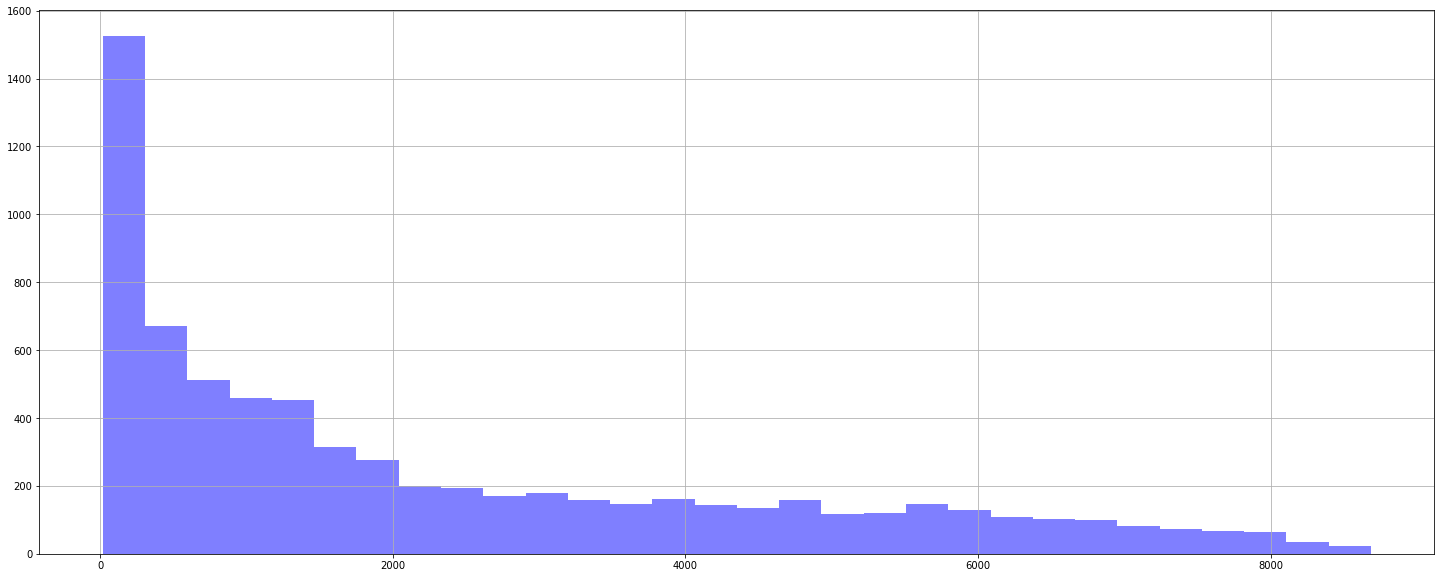

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
dt['TotalCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)

In [212]:
# Randomly selecting value for TotalCharges as a condition to check frequency of most occurred TotalCharges  
len(dt[dt['TotalCharges']<2000])

4176

#### Bivariate analysis of TotalCharges with churn

Setting churners and nonchurners data after removing NaN values

In [213]:
churners = dt[dt['Churn']=='Yes']
nonchurners = dt[dt['Churn']=='No']

* Basic summary of TotalCharges among churners

In [214]:
churners.TotalCharges.describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

* Basic summary of MonthlyCharges among non-churners

In [215]:
nonchurners.TotalCharges.describe()

count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: TotalCharges, dtype: float64

* Plotting TotalCharges with churn

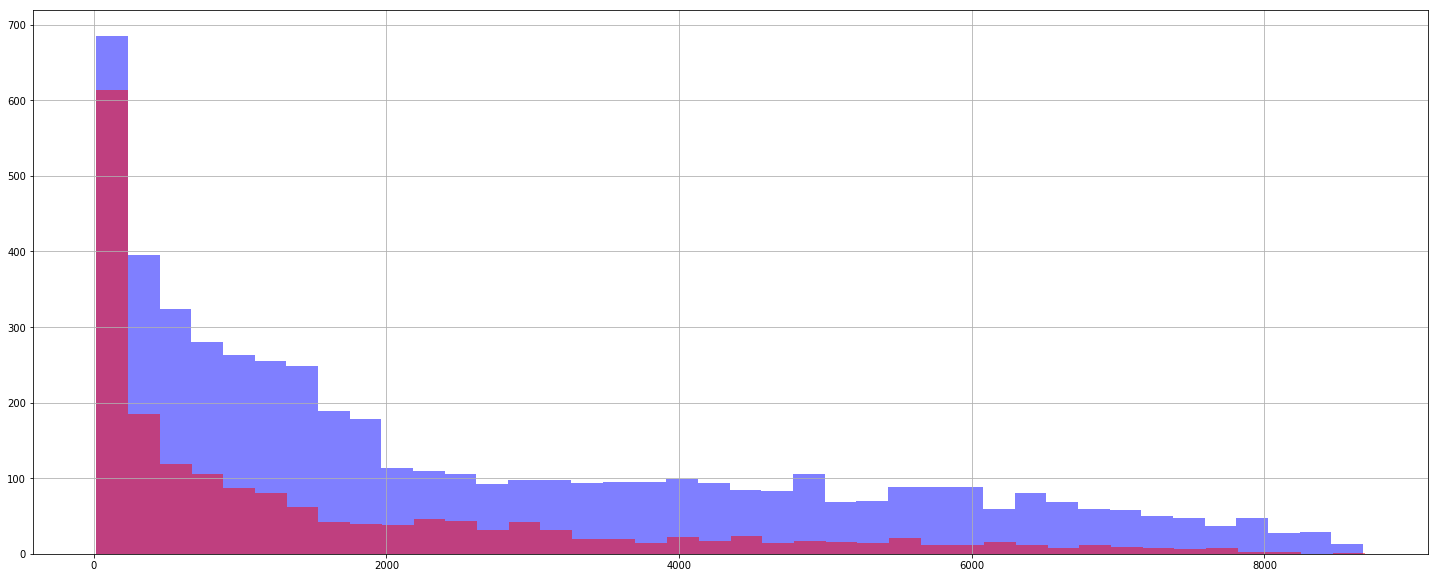

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
dt[dt.Churn == "No"]['TotalCharges'].hist(bins=40, color="blue", alpha=0.5, ax=ax)
dt[dt.Churn == "Yes"]['TotalCharges'].hist(bins=40, color="red", alpha=0.5, ax=ax)

Setting a range where TotalCharges frequency is high

In [217]:
TCharges = churners[(churners['TotalCharges'] > 0)&(churners['TotalCharges'] < 2000)]

In [218]:
len(TCharges)

1339

Finding Ratio and frequency where total charges's frequency is high

In [219]:
count = len(TCharges.TotalCharges)
total = count / len(churners)
total = total*100
print("frequency of dense area of 'Total Charges' in Churners data: ", count)
print("ratio of dense area of 'Total Charges' in Churners data: ", total)

frequency of dense area of 'Total Charges' in Churners data:  1339
ratio of dense area of 'Total Charges' in Churners data:  71.64258962011772


Seperating X and Y for spliting data into test and train so we can input them into a model

In [220]:
# Seperating X
X = dt.TotalCharges
# Encoding Churn into binary class so we can input it the format
dt['churn_encoded'] = dt['Churn'].replace(['Yes','No'],[1,0])
# Seperating Y
Y = dt.churn_encoded
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X,Y)
train_X = train_X.values.reshape(-1,1)
test_X = test_X.values.reshape(-1,1)

Preparing Logistic Regression for fitting, prediction and finding correlation

In [221]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

Fitting Model

In [222]:
NB = clf.fit(train_X,train_Y)

Making predictions

In [223]:
prediction =NB.predict(test_X)

Applying R Square to find correlation between TotalCharges and Churn

In [224]:
r2_score(test_Y, prediction, multioutput='variance_weighted')

-0.38862559241706146

__Conclusion:__ Correlation (-0.331) is not much good enough to use this feature as a predictor

## Exploring Features: Multivariate Analysis

#### * MonthlyCharges in accordance with tenure

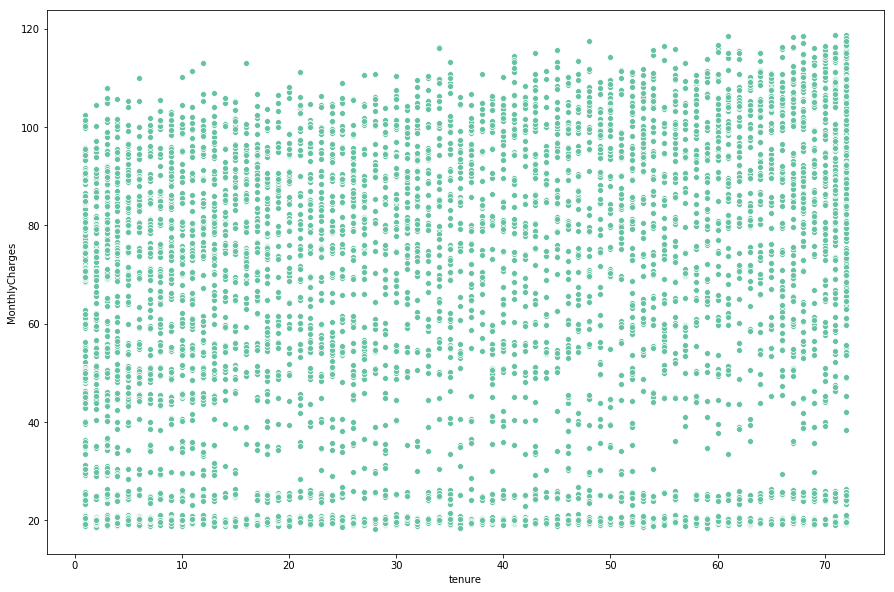

In [225]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x="tenure", y='MonthlyCharges', data=dt)

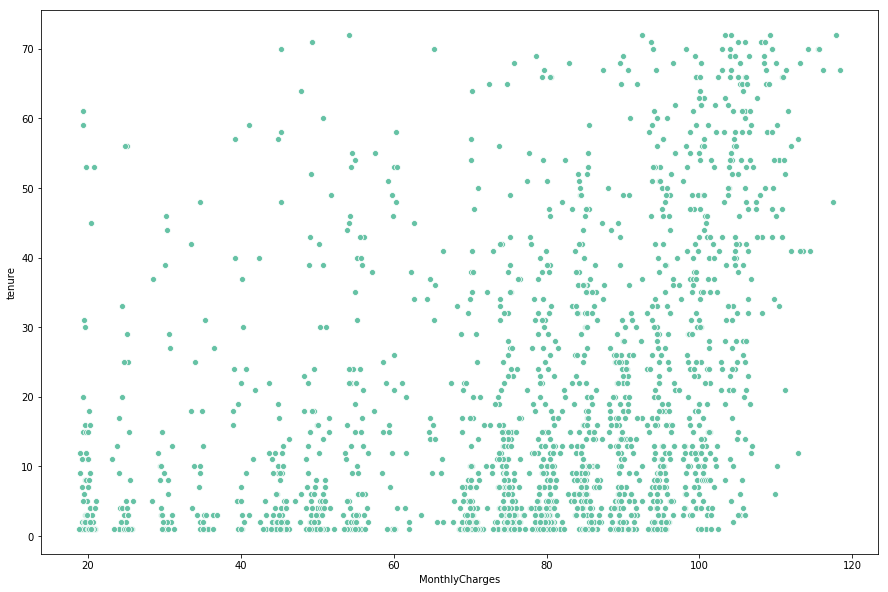

In [226]:
# multivariate
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x="MonthlyCharges", y=dt[dt['Churn']=='Yes']['tenure'], data=dt)

####  (Contract) * Derpendents

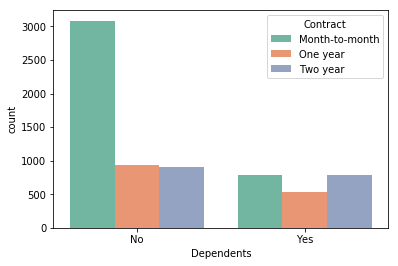

In [227]:
ax = sns.countplot(x="Dependents", hue="Contract", data=dt)

In [228]:
unique = pd.crosstab(dt[(dt['Dependents']=='No')&(dt['Contract']=='Month-to-month')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and contract is Month-to-month", unique)

ratio where dependent is No and contract is Month-to-month 43.88509670079636


In [229]:
unique = pd.crosstab(dt[(dt['Dependents']=='No')&(dt['Contract']=='One year')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and contract is One year", unique)

ratio where dependent is No and contract is One year 13.395904436860068


In [230]:
unique = pd.crosstab(dt[(dt['Dependents']=='No')&(dt['Contract']=='Two year')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and contract is Two year", unique)

ratio where dependent is No and contract is Two year 12.869738339021616


In [231]:
unique = pd.crosstab(dt[(dt['Dependents']=='Yes')&(dt['Contract']=='Month-to-month')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and contract is Month-to-month", unique)

ratio where dependent is Yes and contract is Month-to-month 11.220136518771332


In [232]:
unique = pd.crosstab(dt[(dt['Dependents']=='Yes')&(dt['Contract']=='One year')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and contract is One year", unique)

ratio where dependent is Yes and contract is One year 7.536973833902162


In [233]:
unique = pd.crosstab(dt[(dt['Dependents']=='Yes')&(dt['Contract']=='Two year')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and contract is two year", unique)

ratio where dependent is Yes and contract is two year 11.092150170648464


####  (TechSupport) * Derpendents

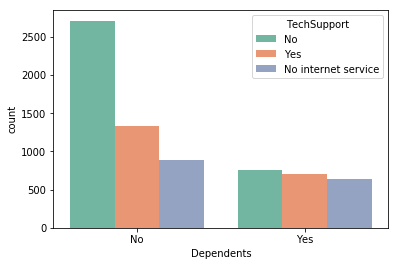

In [234]:
ax = sns.countplot(x="Dependents", hue="TechSupport", data=dt)

In [235]:
unique = pd.crosstab(dt[(dt['Dependents']=='No')&(dt['TechSupport']=='No')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and TechSupport is No", unique)

ratio where dependent is No and TechSupport is No 38.55233219567691


In [236]:
unique = pd.crosstab(dt[(dt['Dependents']=='No')&(dt['TechSupport']=='Yes')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and TechSupport is Yes", unique)

ratio where dependent is No and TechSupport is Yes 19.041524459613196


In [237]:
unique = pd.crosstab(dt[(dt['Dependents']=='No')&(dt['TechSupport']=='No internet service')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and and TechSupport is No internet service: ", unique)

ratio where dependent is No and and TechSupport is No internet service:  12.55688282138794


In [238]:
unique = pd.crosstab(dt[(dt['Dependents']=='Yes')&(dt['TechSupport']=='No')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is No", unique)

ratio where dependent is Yes and TechSupport is No 10.821956769055745


In [239]:
unique = pd.crosstab(dt[(dt['Dependents']=='Yes')&(dt['TechSupport']=='Yes')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is Yes", unique)

ratio where dependent is Yes and TechSupport is Yes 9.968714448236632


In [240]:
unique = pd.crosstab(dt[(dt['Dependents']=='Yes')&(dt['TechSupport']=='No internet service')]['Dependents'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is No internet service", unique)

ratio where dependent is Yes and TechSupport is No internet service 9.05858930602958


####  (TechSupport) * Contract

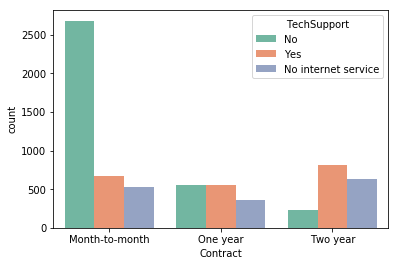

In [241]:
ax = sns.countplot(x="Contract", hue="TechSupport", data=dt)

In [242]:
unique = pd.crosstab(dt[(dt['Contract']=='Month-to-month')&(dt['TechSupport']=='No')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and TechSupport is No", unique)

ratio where dependent is No and TechSupport is No 38.111490329920365


In [243]:
unique = pd.crosstab(dt[(dt['Contract']=='Month-to-month')&(dt['TechSupport']=='Yes')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and TechSupport is Yes", unique)

ratio where dependent is No and TechSupport is Yes 9.542093287827075


In [244]:
unique = pd.crosstab(dt[(dt['Contract']=='Month-to-month')&(dt['TechSupport']=='No internet service')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is No and and TechSupport is No internet service: ", unique)

ratio where dependent is No and and TechSupport is No internet service:  7.451649601820249


In [245]:
unique = pd.crosstab(dt[(dt['Contract']=='Two year')&(dt['TechSupport']=='No')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is No", unique)

ratio where dependent is Yes and TechSupport is No 3.341865756541525


In [246]:
unique = pd.crosstab(dt[(dt['Contract']=='Two year')&(dt['TechSupport']=='Yes')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is Yes", unique)

ratio where dependent is Yes and TechSupport is Yes 11.618316268486916


In [247]:
unique = pd.crosstab(dt[(dt['Contract']=='Two year')&(dt['TechSupport']=='No internet service')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is No internet service", unique)

ratio where dependent is Yes and TechSupport is No internet service 9.00170648464164


In [248]:
unique = pd.crosstab(dt[(dt['Contract']=='One year')&(dt['TechSupport']=='No')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is No", unique)

ratio where dependent is Yes and TechSupport is No 7.9209328782707615


In [249]:
unique = pd.crosstab(dt[(dt['Contract']=='One year')&(dt['TechSupport']=='Yes')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is Yes", unique)

ratio where dependent is Yes and TechSupport is Yes 7.849829351535837


In [250]:
unique = pd.crosstab(dt[(dt['Contract']=='One year')&(dt['TechSupport']=='No internet service')]['Contract'] ,'frequency').reset_index()
summ = unique['frequency'].sum()
unique = summ / len(dt) *100
print("ratio where dependent is Yes and TechSupport is No internet service", unique)

ratio where dependent is Yes and TechSupport is No internet service 5.162116040955631


##### Tech Support, monthly Charges

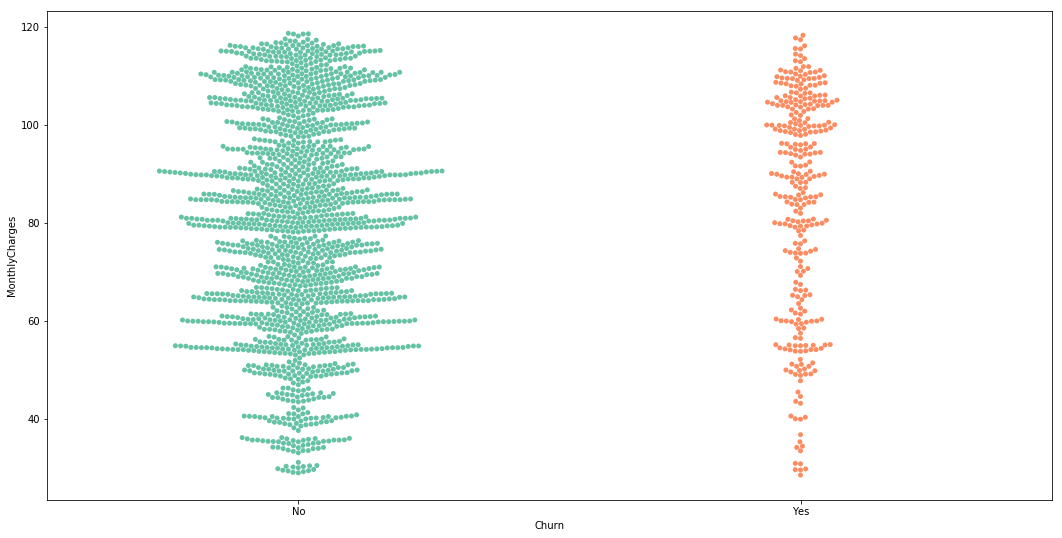

In [251]:
plt.figure(figsize=(18,9))
sns.swarmplot(x=dt[dt['TechSupport']=='Yes']['Churn'], y="MonthlyCharges", data=dt)

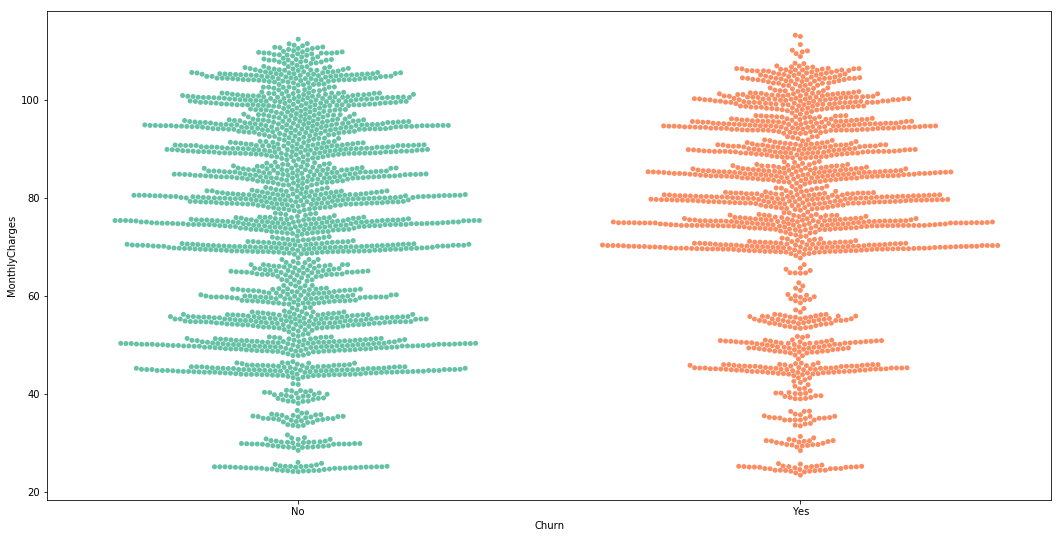

In [252]:
plt.figure(figsize=(18,9))
sns.swarmplot(x=dt[dt['TechSupport']=='No']['Churn'], y="MonthlyCharges", data=dt)

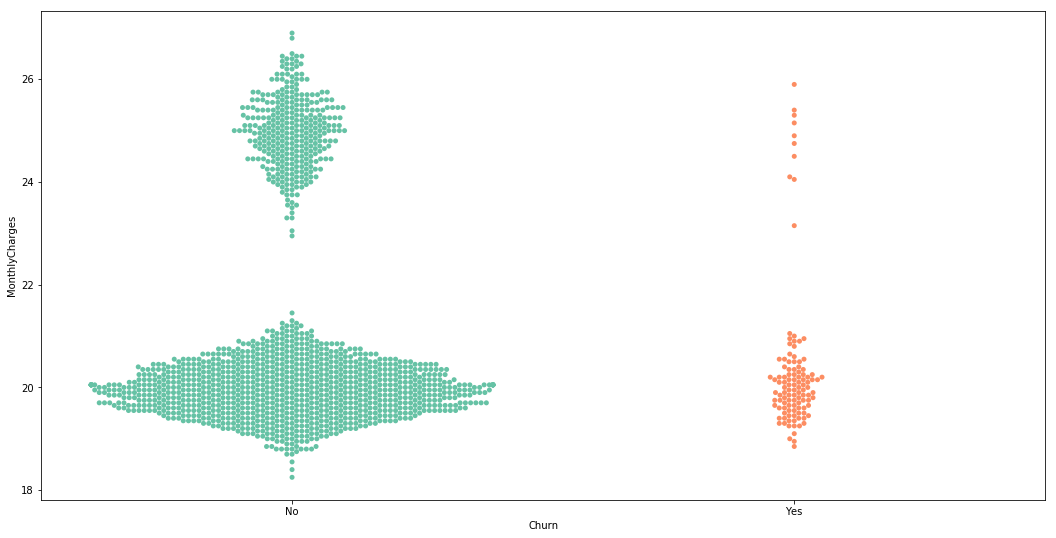

In [253]:
plt.figure(figsize=(18,9))
sns.swarmplot(x=dt[dt['TechSupport']=='No internet service']['Churn'], y="MonthlyCharges", data=dt)

#### gender

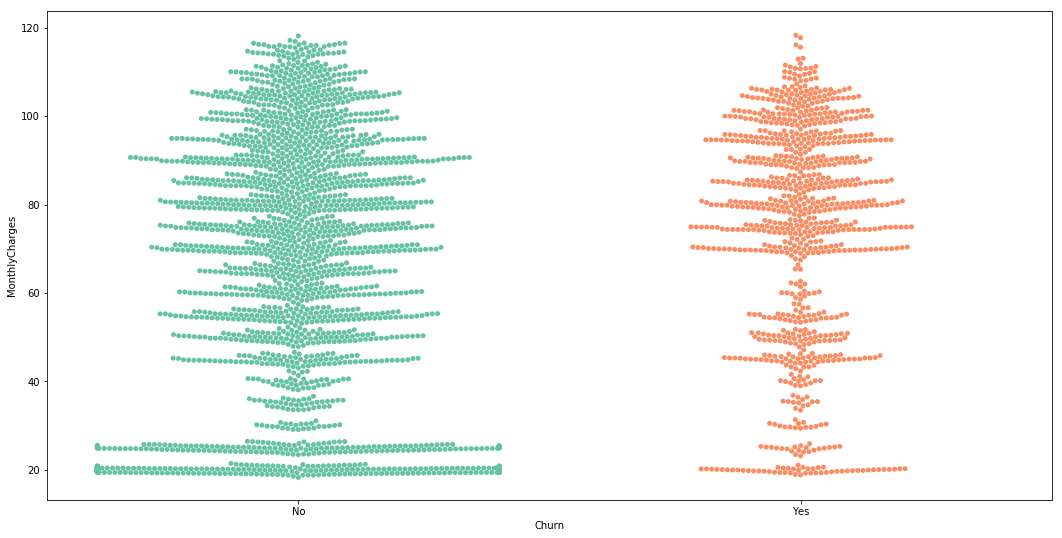

In [254]:
plt.figure(figsize=(18,9))
sns.swarmplot(x=dt[dt['gender']=='Male']['Churn'], y="MonthlyCharges", data=dt)

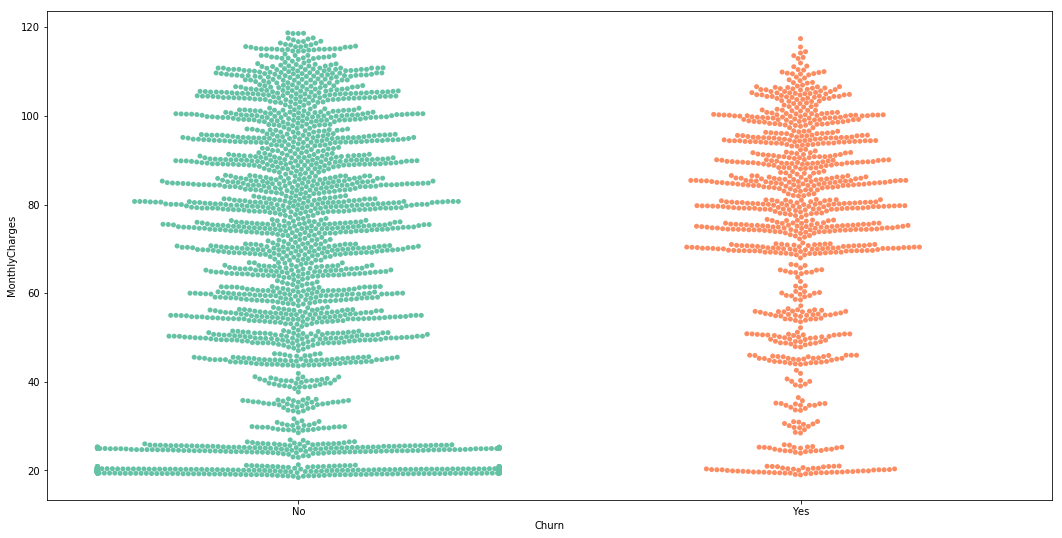

In [255]:
plt.figure(figsize=(18,9))
sns.swarmplot(x=dt[dt['gender']=='Female']['Churn'], y="MonthlyCharges", data=dt)

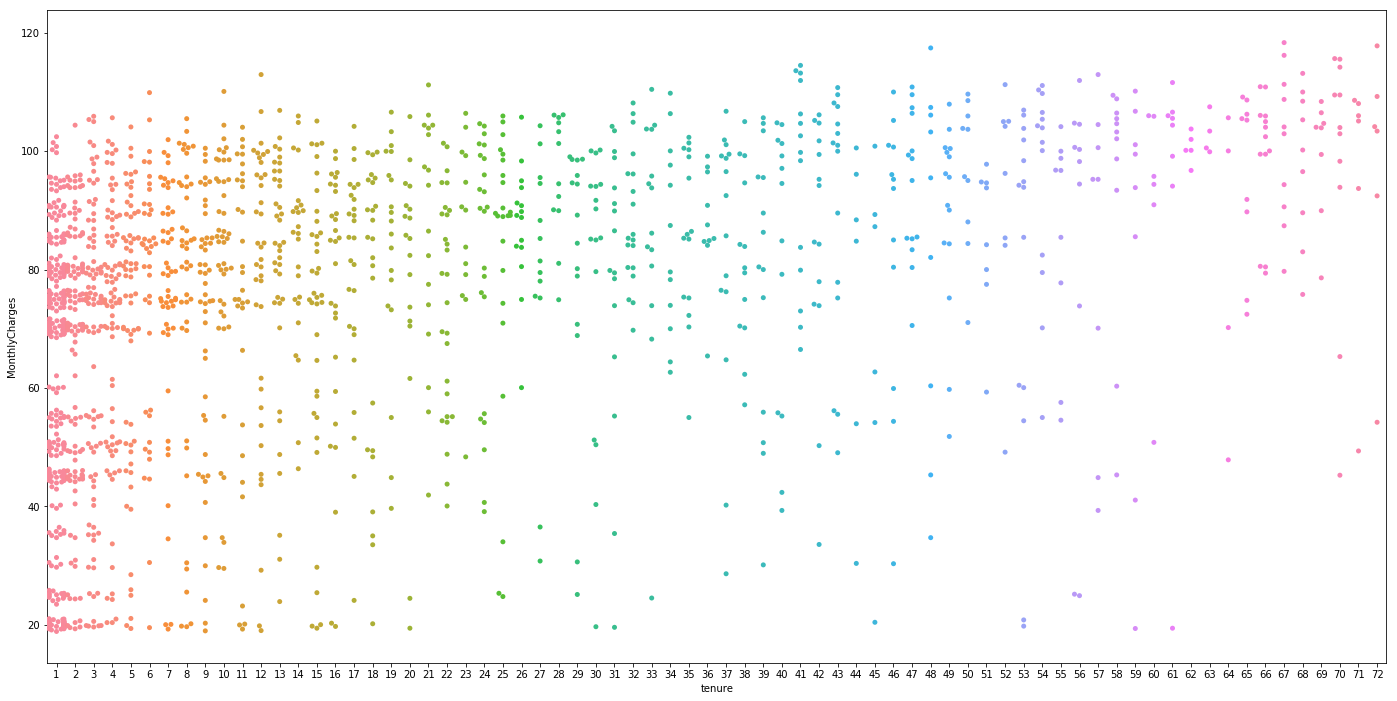

In [256]:
plt.figure(figsize=(24,12))
sns.swarmplot(x=dt[dt['Churn']=='Yes']['tenure'], y=dt.MonthlyCharges, data=dt)

# Step 04) Encoding features

In [257]:
test_dt_encoded = test_dt.copy()

In [258]:
len(test_dt)

7009

In [259]:
test_dt_encoded['gender'].replace(['Male','Female'],[1,0],inplace=True)
test_dt_encoded['Partner'].replace(['Yes','No'],[1,0],inplace=True)
test_dt_encoded['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
test_dt_encoded['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
test_dt_encoded['MultipleLines'].replace(['No phone service','No', 'Yes'],[1,0,2],inplace=True)
test_dt_encoded['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
test_dt_encoded['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,2,1],inplace=True)
test_dt_encoded['OnlineBackup'].replace(['No','Yes','No internet service'],[0,2,1],inplace=True)
test_dt_encoded['DeviceProtection'].replace(['No','Yes','No internet service'],[0,2,1],inplace=True)
test_dt_encoded['TechSupport'].replace(['No','Yes','No internet service'],[0,2,1],inplace=True)
test_dt_encoded['StreamingTV'].replace(['No','Yes','No internet service'],[0,2,1],inplace=True)
test_dt_encoded['StreamingMovies'].replace(['No','Yes','No internet service'],[0,2,1],inplace=True)
test_dt_encoded['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
test_dt_encoded['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
test_dt_encoded['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
test_dt_encoded['Churn'].replace(['Yes','No'],[1,0],inplace=True)

# Step 05) Applying Naive Bayesian

* Seperating X and Y for spliting data into test and train so we can input them into a model

In [260]:
# Seperating X
X = dt[['MonthlyCharges', 'tenure']]
# Seperating Y
Y = dt.churn_encoded

### Iteration # 01

Splitting Dataset into training and testing

In [261]:
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X, Y)

* Preparing Logistic Regression for fitting, prediction and finding correlation

In [262]:
model = GaussianNB()

* Fitting Model

In [263]:
NB = model.fit(train_X, train_Y)

* Making predictions

In [264]:
y_pred = NB.predict(test_X)

 * Validation

In [265]:
print('Accuracy: ',accuracy_score(test_Y, y_pred)*100)

Accuracy:  77.81569965870307


In [266]:
print('Precison: ', precision_score(test_Y,y_pred)*100)

Precison:  63.389830508474574


In [267]:
print('Recall: ', recall_score(test_Y,y_pred)*100)

Recall:  39.872068230277186


In [268]:
print('confusion matrix: ', confusion_matrix(test_Y,y_pred))

confusion matrix:  [[1181  108]
 [ 282  187]]


In [269]:
roc_auc_score(test_Y,y_pred)

0.6574674008876156

### Iteration # 02

Splitting Dataset into training and testing

In [270]:
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, test_size=0.4, random_state=50, shuffle=True)

* Preparing Logistic Regression for fitting, prediction and finding correlation

In [271]:
model = GaussianNB()

* Fitting Model

In [272]:
NB = model.fit(train_X, train_Y)

* Making predictions

In [273]:
y_pred = NB.predict(test_X)

 * Validation

In [274]:
print('Accuracy: ',accuracy_score(test_Y, y_pred)*100)

Accuracy:  78.4216139353004


In [275]:
print('Precison: ', precision_score(test_Y,y_pred)*100)

Precison:  63.11300639658849


In [276]:
print('Recall: ', recall_score(test_Y,y_pred)*100)

Recall:  40.54794520547945


In [277]:
print('confusion matrix: ', confusion_matrix(test_Y,y_pred))

confusion matrix:  [[1910  173]
 [ 434  296]]


In [278]:
roc_auc_score(test_Y,y_pred)

0.6612130817643153

### Iteration # 03

Splitting Dataset into training and testing

In [279]:
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, test_size=0.3, random_state=200)

* Preparing Logistic Regression for fitting, prediction and finding correlation

In [280]:
model = GaussianNB()

* Fitting Model

In [281]:
NB = model.fit(train_X, train_Y)

* Making predictions

In [282]:
y_pred = NB.predict(test_X)

 * Validation

In [283]:
print('Accuracy: ',accuracy_score(test_Y, y_pred)*100)

Accuracy:  78.43601895734598


In [284]:
print('Precison: ', precision_score(test_Y,y_pred)*100)

Precison:  67.63848396501457


In [285]:
print('Recall: ', recall_score(test_Y,y_pred)*100)

Recall:  40.27777777777778


In [286]:
print('confusion matrix: ', confusion_matrix(test_Y,y_pred))

confusion matrix:  [[1423  111]
 [ 344  232]]


In [287]:
roc_auc_score(test_Y,y_pred)

0.6652089671157467

### Iteration # 04

Now using data where noisy data of tenure was removed above

In [288]:
# Removing totalCharges's NaN values to completely refine this feature
total_charges_filter = test_dt['TotalCharges']==' '
#removing null values from data
test_dt = test_dt[~total_charges_filter]
# Converting this feature's datatype from object to float64
test_dt.TotalCharges = pd.to_numeric(test_dt.TotalCharges)

/home/arsal/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Lets view data's shape

In [289]:
test_dt.shape

(7009, 20)

Splitting Dataset into training and testing

In [290]:
X = test_dt[['MonthlyCharges', 'tenure']]
test_dt['churn_encoded'] = test_dt['Churn'].replace(['Yes','No'],[1,0])
Y = test_dt.churn_encoded

In [291]:
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X, Y)

* Preparing Logistic Regression for fitting, prediction and finding correlation

In [292]:
model = GaussianNB()

* Fitting Model

In [293]:
NB = model.fit(train_X, train_Y)

* Making predictions

In [294]:
y_pred = NB.predict(test_X)

 * Validation

In [295]:
print('Accuracy: ',accuracy_score(test_Y, y_pred)*100)

Accuracy:  79.40673131774102


In [296]:
print('Precison: ', precision_score(test_Y,y_pred)*100)

Precison:  65.35714285714286


In [297]:
print('Recall: ', recall_score(test_Y,y_pred)*100)

Recall:  40.939597315436245


In [298]:
print('confusion matrix: ', confusion_matrix(test_Y,y_pred))

confusion matrix:  [[1209   97]
 [ 264  183]]


In [299]:
roc_auc_score(test_Y,y_pred)

0.6675616925496161

### Iteration # 05

Using test-dt, parameter tuning (train_test_split)

Splitting Dataset into training and testing

In [300]:
X = test_dt[['MonthlyCharges', 'tenure']]
test_dt['churn_encoded'] = test_dt['Churn'].replace(['Yes','No'],[1,0])
Y = test_dt.churn_encoded
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, random_state=150)

* Preparing Logistic Regression for fitting, prediction and finding correlation

In [301]:
model = GaussianNB()

* Fitting Model

In [302]:
NB = model.fit(train_X, train_Y)

* Making predictions

In [303]:
y_pred = NB.predict(test_X)

 * Validation

In [304]:
print('Accuracy: ',accuracy_score(test_Y, y_pred)*100)

Accuracy:  80.43354249857387


In [305]:
print('Precison: ', precision_score(test_Y,y_pred)*100)

Precison:  68.30985915492957


In [306]:
print('Recall: ', recall_score(test_Y,y_pred)*100)

Recall:  43.40044742729307


In [307]:
print('confusion matrix: ', confusion_matrix(test_Y,y_pred))

confusion matrix:  [[1216   90]
 [ 253  194]]


In [308]:
roc_auc_score(test_Y,y_pred)

0.6825458818531575

### Iteration # 06

__Using test-dt, parameter tuning (train_test_split)__

#### Feature Engineering

Creating buckets of tenure just to have seperate levels and to examin each range in bucket

In [309]:
test_dt['tenure_buckets'] = np.where((test_dt['tenure'] >1) & (test_dt['tenure'] <= 20),'1-20',
                                np.where((test_dt['tenure'] >20) & (test_dt['tenure'] <= 40),'21-40',
                               np.where((test_dt['tenure'] >41) & (test_dt['tenure'] <= 60),'41-60',
                                       '70 onwards')))

In [310]:
test_dt['tenure_buckets_encoded'] = test_dt['tenure_buckets'].replace(['1-20','21-40','41-60','70 onwards'],[20,40,60,70])

In [311]:
test_dt.dtypes

gender                     object
SeniorCitizen               int64
Partner                    object
Dependents                 object
tenure                      int64
PhoneService               object
MultipleLines              object
InternetService            object
OnlineSecurity             object
OnlineBackup               object
DeviceProtection           object
TechSupport                object
StreamingTV                object
StreamingMovies            object
Contract                   object
PaperlessBilling           object
PaymentMethod              object
MonthlyCharges            float64
TotalCharges              float64
Churn                      object
churn_encoded               int64
tenure_buckets             object
tenure_buckets_encoded      int64
dtype: object

Splitting Dataset into training and testing

In [312]:
X = test_dt[['MonthlyCharges', 'tenure', 'tenure_buckets_encoded']]
test_dt['churn_encoded'] = test_dt['Churn'].replace(['Yes','No'],[1,0])
Y = test_dt.churn_encoded
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, random_state=150)

* Preparing Logistic Regression for fitting, prediction and finding correlation

In [313]:
model = GaussianNB()

* Fitting Model

In [314]:
NB = model.fit(train_X, train_Y)

* Making predictions

In [315]:
y_pred = NB.predict(test_X)

 * Validation

In [316]:
print('Accuracy: ',accuracy_score(test_Y, y_pred)*100)

Accuracy:  77.124928693668


In [317]:
print('Precison: ', precision_score(test_Y,y_pred)*100)

Precison:  56.25


In [318]:
print('Recall: ', recall_score(test_Y,y_pred)*100)

Recall:  46.308724832214764


In [319]:
print('confusion matrix: ', confusion_matrix(test_Y,y_pred))

confusion matrix:  [[1145  161]
 [ 240  207]]


In [320]:
roc_auc_score(test_Y,y_pred)*100


66.99050330431565

### Iteration # 07

__Using test-dt, parameter tuning (train_test_split)__

Splitting Dataset into training and testing

In [321]:
len(test_dt['tenure_buckets_encoded'] )

7009

In [322]:
test_dt_encoded['tenure_buckets_encoded'] = test_dt['tenure_buckets_encoded']
X = test_dt_encoded[['MonthlyCharges', 'TotalCharges', 'tenure', 'tenure_buckets_encoded']]
Y = test_dt_encoded.Churn
# Spliting data into training set and testing set
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, random_state=150)

* Preparing Logistic Regression for fitting, prediction and finding correlation

In [323]:
model = GaussianNB()

* Fitting Model

In [324]:
NB = model.fit(train_X, train_Y)

* Making predictions

In [325]:
y_pred = NB.predict(test_X)

 * Validation

In [326]:
print('Accuracy: ',accuracy_score(test_Y, y_pred)*100)

Accuracy:  77.41015402167713


In [327]:
print('Precison: ', precision_score(test_Y,y_pred)*100)

Precison:  55.08982035928144


In [328]:
print('Recall: ', recall_score(test_Y,y_pred)*100)

Recall:  61.74496644295302


In [329]:
print('confusion matrix: ', confusion_matrix(test_Y,y_pred))

confusion matrix:  [[1081  225]
 [ 171  276]]


In [330]:
roc_auc_score(test_Y,y_pred)*100

72.25839440064955

In [331]:
# test_dt_encoded.to_csv('/home/arsal/Data/TelecommDataCleanEnc.csv')